# Predictive Model for Heart Disease Detection

**Done by:** Nga Wei En + YiFan + HongChao

### Project Objective - Modelling

The core objective of this phase of the project is to develop and fine-tune predictive models that effectively identify the likelihood of heart disease in individuals based on a rich dataset incorporating lifestyle choices, health factors, and biodemographic information. This phase is crucial for establishing the foundational predictive capabilities that will drive early diagnosis and interventions for heart disease.

Specific Goals:

1. Model Selection: Evaluate the applicability and effectiveness of various predictive modeling techniques, including Decision Trees, Random Forests, and Neural Networks. This will involve an assessment of each model's ability to handle the complexity of the dataset and its predictive accuracy.
2. Data Handling: Implement advanced data preparation techniques to ensure the models are trained on quality data. This includes handling missing data, removing duplicates, normalizing distributions, and encoding categorical variables.
3. Performance Optimization: Utilize resampling techniques such as undersampling, oversampling, and Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in the dataset, aiming to improve the models’ sensitivity and specificity.
4. Model Tuning: Conduct rigorous parameter tuning for each model to enhance its predictive performance. This will involve adjusting hyperparameters, using techniques like grid search and cross-validation to find the optimal settings.
5. Model Evaluation: Thoroughly evaluate each model using a range of metrics including accuracy, precision, recall, F1-score, and Area Under the Receiver Operating Characteristic Curve (AUC). This step is vital to understanding each model's strengths and limitations in the context of heart disease prediction.

At the end of the modeling phase, we aim to identify and fine-tune the most effective predictive model that achieves high accuracy and demonstrates reliability and robustness in predicting heart disease. This model will serve as a critical component in a larger system aimed at enhancing clinical decision-making and improving patient outcomes in the realm of heart health.

## Import Necessary Library

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc_context

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import StratifiedKFold

from tensorflow import keras
from tensorflow.keras import layers

from scipy.stats import chi2_contingency, pointbiserialr, chi2_contingency

from sklearn.base import BaseEstimator, ClassifierMixin
from eli5.sklearn import PermutationImportance
import eli5

from  imblearn.over_sampling import KMeansSMOTE

import warnings    
warnings.filterwarnings("ignore")

plt.style.use("default")

## Get Data

In [3]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [106]:
df = pd.read_csv('df_clean_wo_labelEncoding.csv')
df_clean = pd.read_csv('df_clean.csv')

---

## Modelling

### Classification Tree
Objective:

The main objective of the classification phase is to apply and optimize predictive modeling techniques to classify individuals based on their risk of developing heart disease. This phase is critical for translating complex health data into actionable insights that can guide clinical decisions and preventative strategies.

Initially, a Decision Tree model is created with a specified maximum depth of 5 to avoid overfitting, and it is trained on labeled training data. Key steps include visualizing the tree to understand decision-making processes at the initial levels, making predictions on both training and testing datasets, and then generating confusion matrices for these predictions to visualize the actual versus predicted classifications.

Performance metrics such as the True Positive Rate, False Positive Rate, Precision, Recall, and F1-Score are calculated to assess the classifier's effectiveness. The ROC curve and AUC score are utilized to evaluate the model's discriminative ability between classes under various threshold settings. Additionally, feature importance analysis is conducted, revealing which variables most significantly influence heart disease predictions. This insight is crucial for understanding the driving factors behind the model's decisions and guiding future data collection and feature engineering efforts.

Overall, this Decision Tree classifier serves as a predictive tool and an analytical framework for identifying and quantifying the impact of different health-related variables on heart disease outcomes. The combination of performance evaluation, visualization, and feature importance analysis provides a robust foundation for refining and applying the model effectively in clinical or health policy settings.

In [37]:
dectree = DecisionTreeClassifier(
    max_depth=5
)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [68]:
dectree = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=50, # The min samples required to split an internal node
    
    min_samples_leaf=10,  # The min samples a node must have to be a leaf node
    
    max_features=None,    # Use all features for splitting
    
    criterion='gini',     # Gini impurity measure for the 
                          # quality of splits
    
    splitter='best',      # Ensuring the best possible split at each node
    
    class_weight=None     # Treating all classes equally
)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=50)

<Figure size 1000x1000 with 0 Axes>

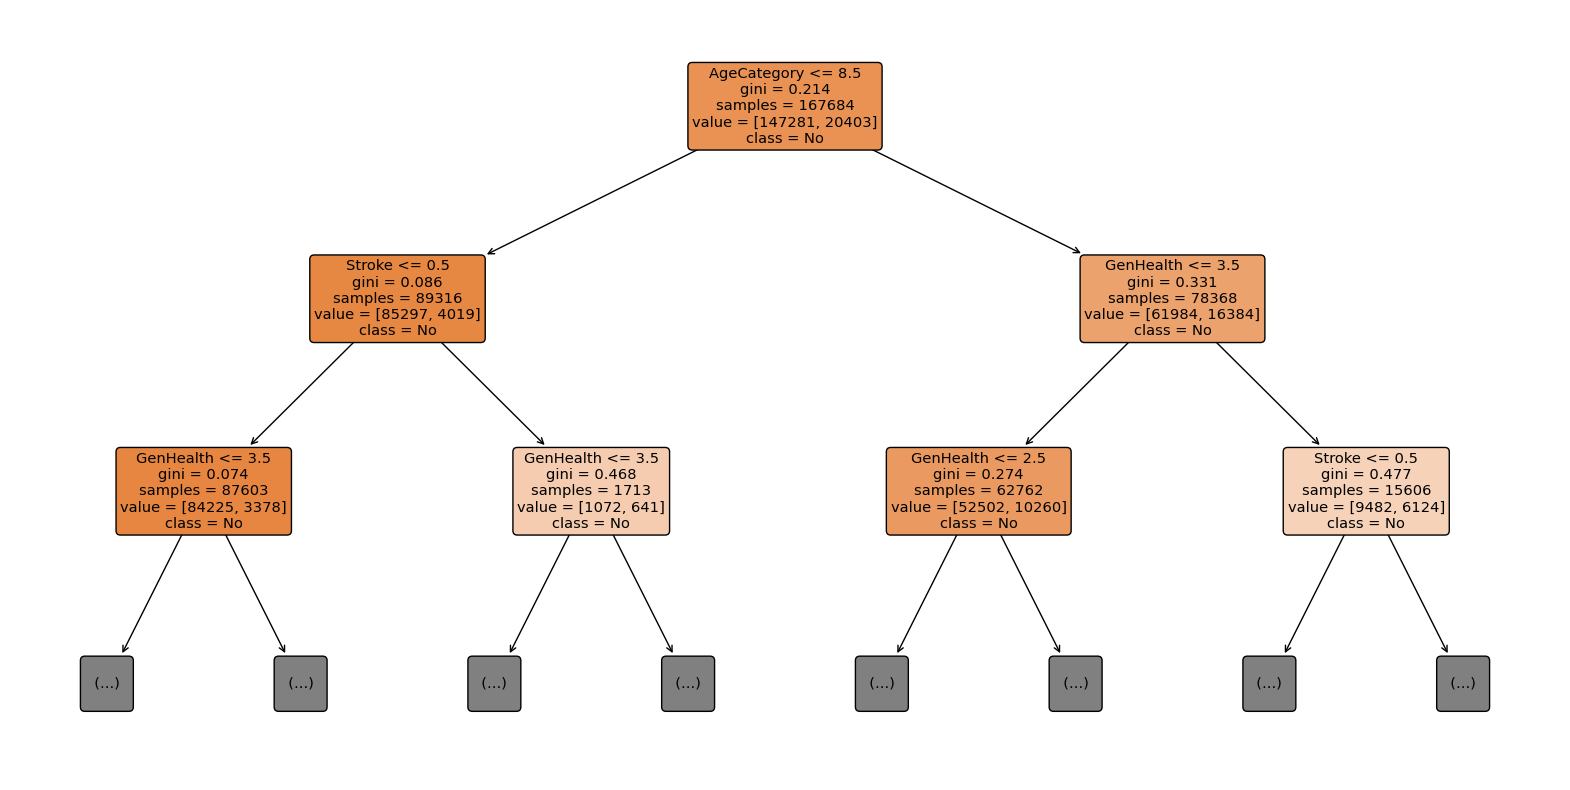

In [120]:
f = plt.figure(figsize=(10,10))
feature_names = x_train.columns.tolist()

with rc_context({'font.size': 60}):
    f = plt.figure(figsize=(20, 10))
    plot_tree(dectree, filled=True, rounded=True, max_depth=2,
              feature_names=feature_names, class_names=['No', 'Yes'])
    plt.show()

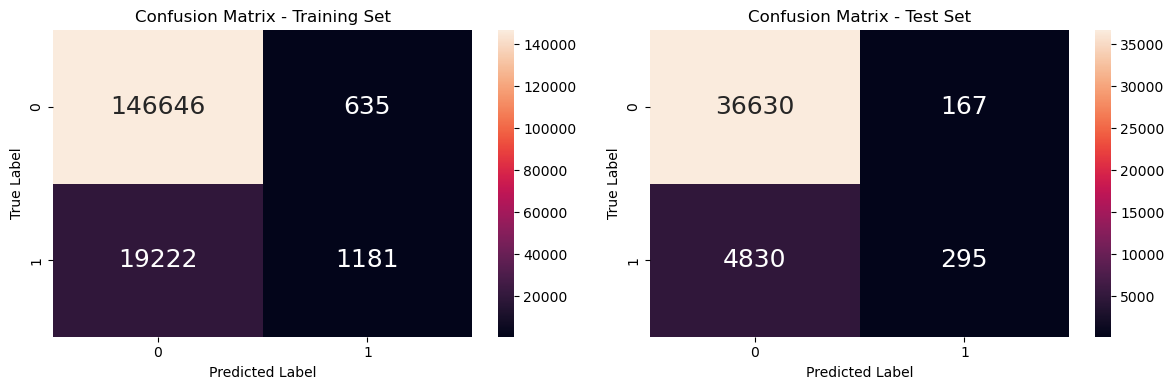

In [70]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

CM1 = confusion_matrix(y_train, y_train_pred)
TN1 = CM1[0][0]
FN1 = CM1[1][0]
TP1 = CM1[1][1]
FP1 = CM1[0][1]
TPR1 = TP1 / (TP1 + FN1)
FPR1 = FP1 / (TN1 + FP1)
TNR1 = TN1 / (TN1 + FP1)
FNR1 = FN1 / (TP1 + FN1)

CM2 = confusion_matrix(y_test, y_test_pred)
TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]
TPR2 = TP2 / (TP2 + FN2)
FPR2 = FP2 / (TN2 + FP2)
TNR2 = TN2 / (TN2 + FP2)
FNR2 = FN2 / (TP2 + FN2)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(CM1, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')  # Adding a title
axes[0].set_xlabel('Predicted Label')  # Adding x-axis label
axes[0].set_ylabel('True Label')  # Adding y-axis label

# Plotting the second confusion matrix for the test set
sns.heatmap(CM2, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')  # Adding a title
axes[1].set_xlabel('Predicted Label')  # Adding x-axis label
axes[1].set_ylabel('True Label')  # Adding y-axis label

# Display the plot
plt.tight_layout()  # Adjust layout to make room for titles
plt.show()

Evaluation Metrics:
ROC-AUC: 0.8178427164992905
Precision: 0.6385281385281385
F1 Score: 0.1056022910327546
Recall: 0.0575609756097561

Goodness of Fit
Train Dataset
Classification Accuracy is	 0.8815808306099568
The True Positive Rate is	 0.057883644562074205
The False Positive Rate is	 0.0043114862066390095

Test Dataset
Classification Accuracy is	 0.8808024426315538
The True Positive Rate is	 0.0575609756097561
The False Positive Rate is	 0.004538413457618827



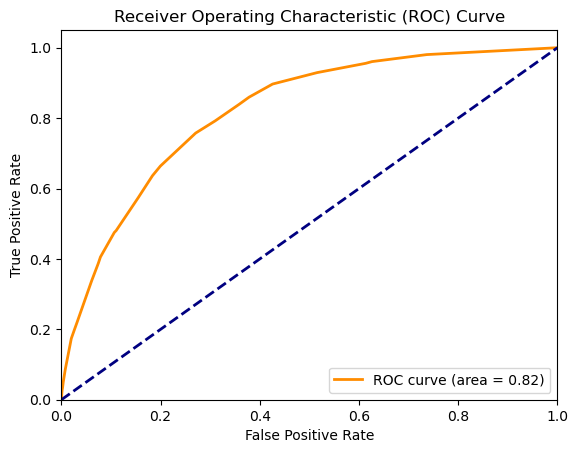

In [71]:

# Compute probabilities for the positive class
y_prob = dectree.predict_proba(x_test)[:, 1]

# Compute predictions
y_test_pred = dectree.predict(x_test)

roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("ROC-AUC:", roc_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)
print()

print("Goodness of Fit")
print("Train Dataset")
print("Classification Accuracy is\t", dectree.score(x_train, y_train))
print("The True Positive Rate is\t", TPR1)
print("The False Positive Rate is\t", FPR1)
#print("The True Negative Rate is\t", TNR1)
#print("The False Negative Rate is\t", FNR1)

print()

print("Test Dataset")
print("Classification Accuracy is\t", dectree.score(x_test, y_test))
print("The True Positive Rate is\t", TPR2)
print("The False Positive Rate is\t", FPR2)
#print("The True Negative Rate is\t", TNR2)
#print("The False Negative Rate is\t", FNR2)
print()


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

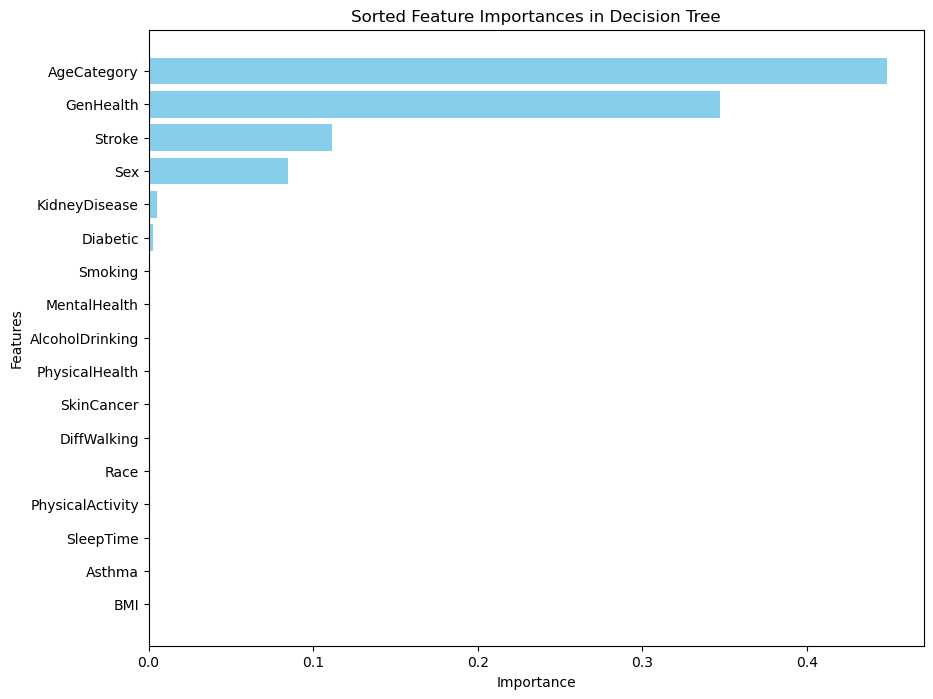

In [72]:
feature_importances = dectree.feature_importances_

# Create arrays from feature names and importances
features = np.array(feature_names)
importances = np.array(feature_importances)

# Sort the features by importance
indices = np.argsort(importances)
sorted_features = features[indices]
sorted_importances = importances[indices]

# Create a bar graph for the sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importances in Decision Tree')
plt.show()


### Random Forest
Random Forest, an ensemble learning method, leverages multiple decision trees to make a more stable and reliable prediction by averaging the results of individual trees. This approach mitigates overfitting, a common issue with single decision trees, especially in complex datasets.

1. Model Configuration and Training:
Instantiate a RandomForestClassifier with a specified number of trees (e.g., n_estimators=100) and a reasonable depth to control complexity.
Train the model using the x_train dataset and y_train labels. The ensemble nature of Random Forest allows it to capture more nuanced patterns in the data without overfitting, compared to a single Decision Tree.

2. Prediction and Performance Evaluation:
Use the trained Random Forest model to make predictions on both the training and testing datasets.
Generate confusion matrices for both sets to detail true positives, true negatives, false positives, and false negatives, providing a clear visual representation of model performance.
To assess the model's effectiveness, calculate key metrics such as accuracy, precision, recall, and F1-score. Additionally, the ROC curve and AUC score are derived to evaluate the model's discriminative capacity.

3. Feature Importance Analysis:
Random Forest provides an in-built method to evaluate the importance of each feature in the prediction process. This is particularly useful for identifying and prioritizing the risk factors that most significantly impact heart disease, thereby guiding future healthcare strategies and interventions.

In [101]:
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='gini',         
    max_depth=6,          # Max depth of the tree
    min_samples_split=50,     # Min samples to split node
    min_samples_leaf=10      # Min samples to be leaf node
)

# Train the model on the training data
random_forest_model.fit(x_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}\n")

# Analyzing feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)


Accuracy: 0.88073088116025

Confusion Matrix:
[[36658   139]
 [ 4861   264]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     36797
           1       0.66      0.05      0.10      5125

    accuracy                           0.88     41922
   macro avg       0.77      0.52      0.52     41922
weighted avg       0.86      0.88      0.83     41922


Feature Importances:
 AgeCategory         0.291267
GenHealth           0.221984
Stroke              0.137743
DiffWalking         0.094200
Diabetic            0.074053
Sex                 0.046201
PhysicalHealth      0.043675
KidneyDisease       0.039764
Smoking             0.017024
SkinCancer          0.013223
Race                0.005671
BMI                 0.004479
PhysicalActivity    0.003797
MentalHealth        0.002937
SleepTime           0.002231
Asthma              0.001168
AlcoholDrinking     0.000584
dtype: float64


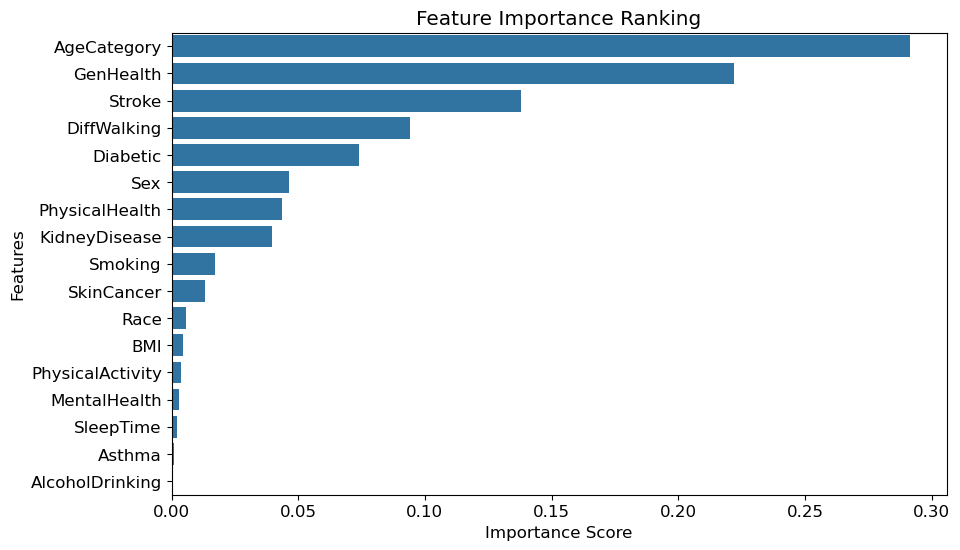

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

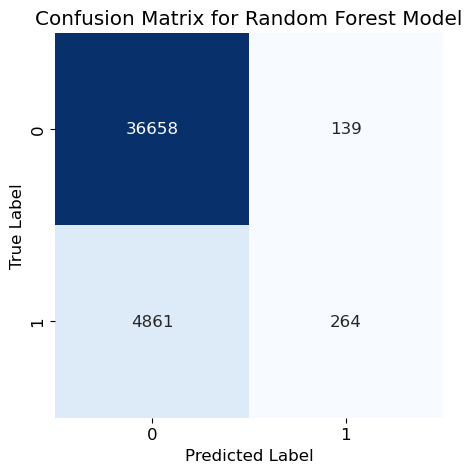

In [103]:
# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

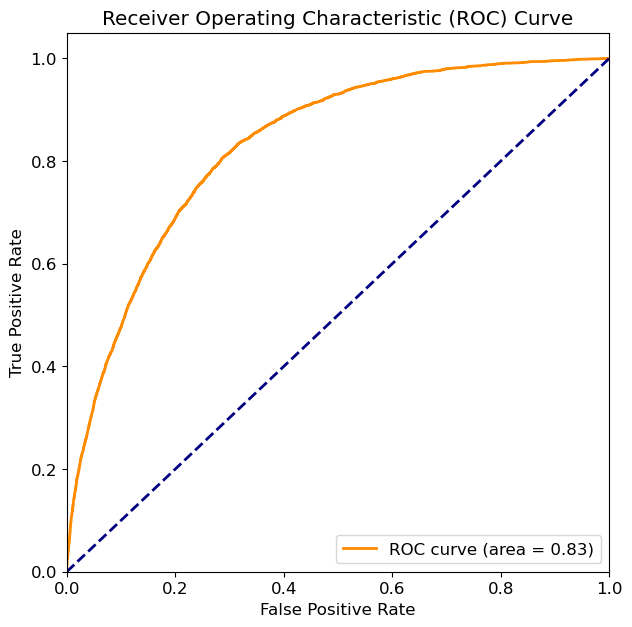

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Compute ROC curve and ROC area for each class
y_prob = random_forest_model.predict_proba(x_test)[:, 1] # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

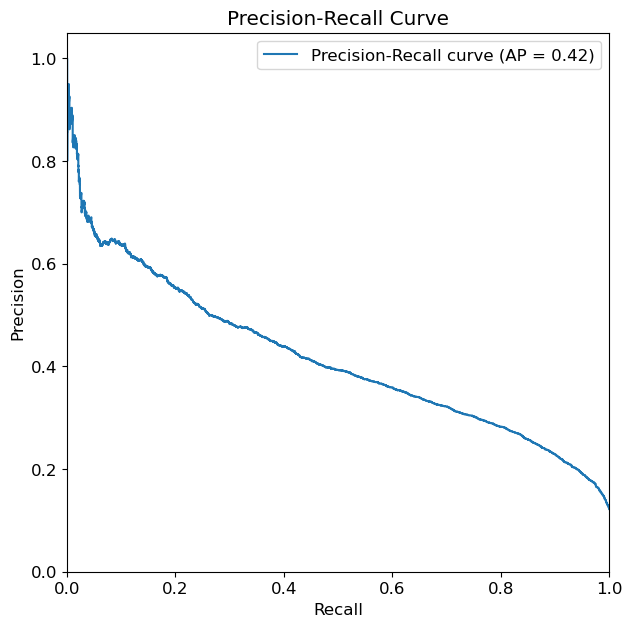

In [105]:
y_score = random_forest_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(7, 7))
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [100]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

Accuracy: 0.8809
Precision: 0.6506
Recall: 0.0552
F1-Score: 0.1018
ROC-AUC: 0.8309



### Neural Network
The objective of employing neural networks in our heart disease prediction project is to harness the advanced computational capabilities of these models to address the complex and nonlinear relationships inherent in medical data. Neural networks are particularly well-suited for this task due to their deep learning structures, which allow them to learn high-level abstractions in data through architectures that mimic human neural architectures.

1. Model Architecture:
The model comprises three layers: two hidden layers with 256 neurons each, ReLU activation functions, batch normalization, and dropout to prevent overfitting. A sigmoid activation function in the output layer allows binary classification.
2. Model Compilation:
The neural network is compiled using the Adam optimizer and binary crossentropy loss, which are suitable for binary classification tasks.
Training:
The model is trained in epochs with a batch size of 32, allowing for efficient gradient updates over the training data.
3. Evaluation and Metrics:
After training, the model's performance is evaluated on a separate test set within each fold of the cross-validation, and key metrics such as loss and binary accuracy are recorded. Additionally, predictions are used to compute a confusion matrix and calculate precision, recall, F1-score, and AUC for each fold.
4. Feature Importance:
Permutation Importance is employed post-training to assess the impact of each feature on the predictions. This analysis helps identify which features significantly influence the model's decision-making process.


Training for fold 1 ...
Epoch 1/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step - binary_accuracy: 0.8871 - loss: 0.3052
Epoch 2/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 672us/step - binary_accuracy: 0.9103 - loss: 0.2432
Epoch 3/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 724us/step - binary_accuracy: 0.9115 - loss: 0.2400
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
Score for fold 1: loss of 0.2365095019340515; compile_metrics of 91.22400283813477%

Training for fold 2 ...
Epoch 1/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 675us/step - binary_accuracy: 0.8868 - loss: 0.3047
Epoch 2/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - binary_accuracy: 0.9099 - loss: 0.2436
Epoch 3/3
5770/5770 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - binary_accuracy: 0.9110 - loss: 0.2407
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
Score for fold 2: loss of 0.24254049360752106; compile_metrics of 91.19998216629028%

Training for fold 3 ...
E

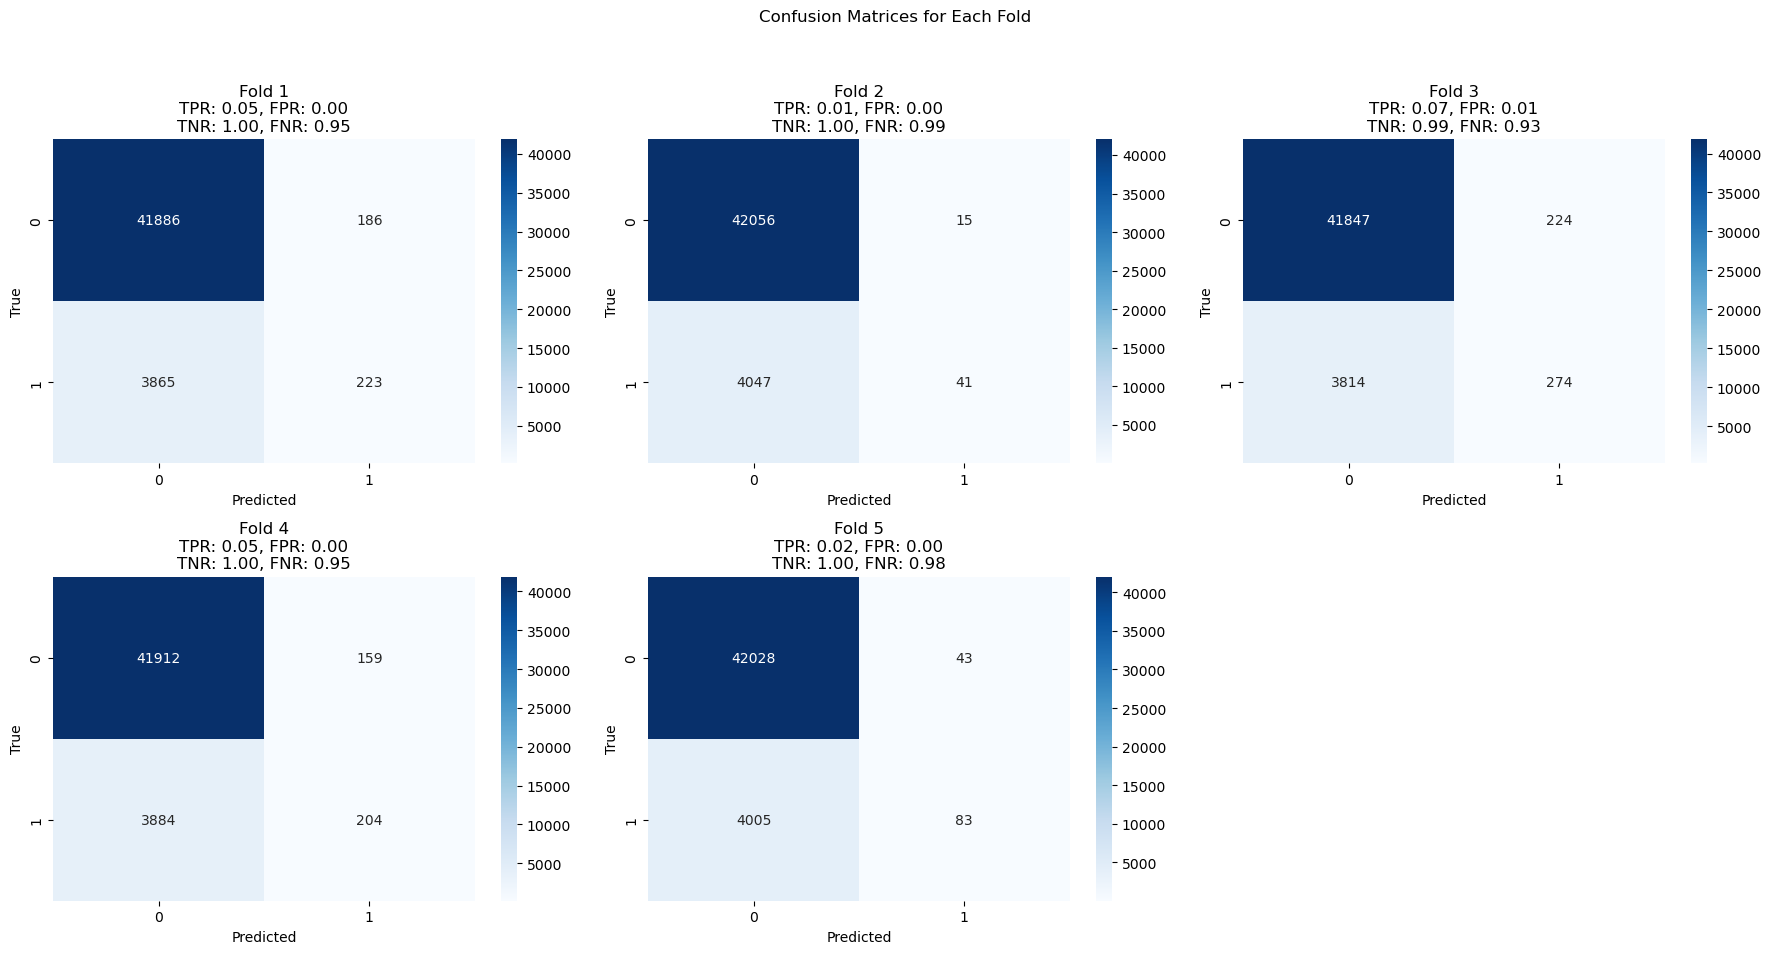

In [37]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    
    # Building the Neural Network Model with three layers
    model = keras.Sequential([
        
        # First dense layer with ReLU activation to capture non-linear relationships
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Repeat the above layers to increase the model's ability to learn complex patterns
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Output layer using sigmoid activation to predict a binary outcome
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(
    optimizer='adam',  # effective use of the adaptive learning rate that helps in 
                       # converging faster and more efficiently.
        
    loss='binary_crossentropy',  # Binary crossentropy is used for binary classification tasks.
                                 # Instead of categorical_crossentropy.
        
    metrics=['binary_accuracy']  # 'binary_accuracy' checks the proportion of correct predictions.
    )
   
    model.fit(
    x_train.iloc[train],  
    y_train.iloc[train],  
    batch_size=32,        # Number of samples per gradient update. 
        
    epochs=3,             # Number of epochs to train the model. 
                          # An epoch is an iteration over the entire data provided.
        
    verbose=1             
    )
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

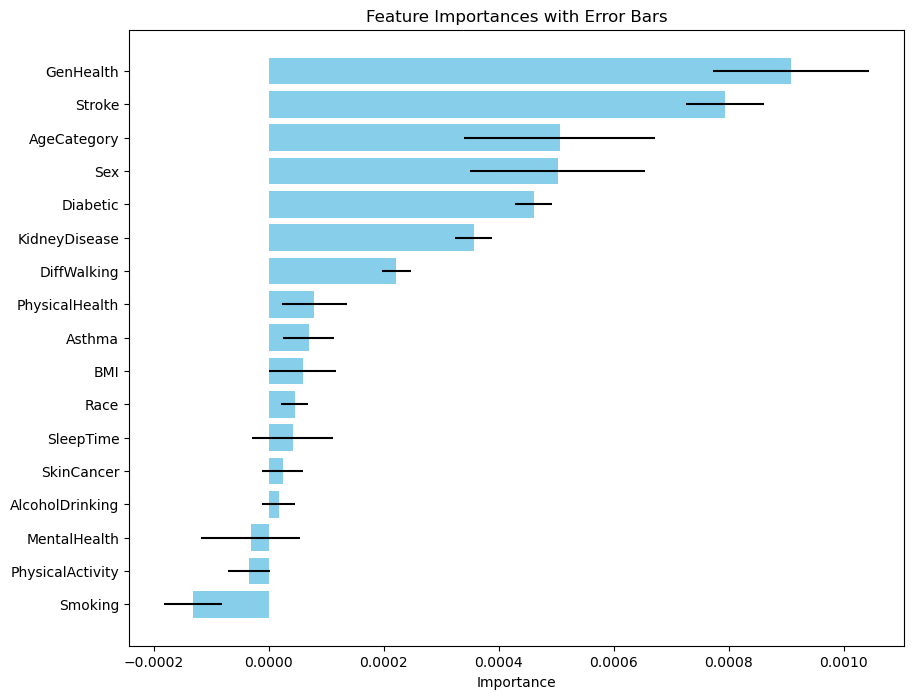

In [38]:
# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy

# Wrap your model
wrapped_model = KerasClassifierWrapper(model)

perm = PermutationImportance(wrapped_model, random_state=1).fit(x_test, y_test)
importances = perm.feature_importances_
std = perm.feature_importances_std_

# Get feature names
feature_names = x_train.columns.tolist()

data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort data by importance for better visualization
data_sorted = data.sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Feature'], data_sorted['Importance'], xerr=data_sorted['Std'], align='center', color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances with Error Bars')
plt.show()

---

## Taking 70% of 0 and 100% of 1 for 'HeartDisease' same size

The approach of taking 70% of the majority class (labelled as '0' for no heart disease) and 100% of the minority class (labelled as '1' for heart disease) to ensure that the two classes are represented approximately equally in the training data is an example of a targeted resampling strategy. This method can be particularly effective in balancing datasets where there is a significant class imbalance, which is often the case in medical datasets like those used for predicting heart diseases.

Objective:
The objective of this resampling strategy is to reduce the imbalance between the two classes in the dataset, thereby preventing the predictive model from being biased towards the majority class. This can enhance the model’s sensitivity to detecting positive cases of heart disease, which are typically less frequent but more crucial to identify accurately.

In [15]:
# Load the datasets from CSV files
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Combine the train and test sets back to form the complete dataset
x = pd.concat([x_train, x_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)
df_clean = pd.concat([x, y], axis=1)

# Count the number of instances for each class
num_yes = len(df_clean[df_clean["HeartDisease"] == 1])
num_no = len(df_clean[df_clean["HeartDisease"] == 0])

print("Original counts:\nYes:", num_yes, "\nNo: ", num_no)

# Separate the data by class
df_yes = df_clean[df_clean["HeartDisease"] == 1]
df_no = df_clean[df_clean["HeartDisease"] == 0]

# Combine the sampled 'Yes' class with the 'No' class
df_clean = pd.concat([df_yes, df_no_sampled])

# Split into training and testing sets
x = df_clean.drop('HeartDisease', axis=1)  
y = df_clean['HeartDisease']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Print the counts in the training and test sets
print("\nTraining set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])


Original counts:
Yes: 25528 
No:  262968

Counts after sampling 70% of 'Yes' class:
Yes: 25528 
No:  184078

Training set size: 167684
Test set size: 41922


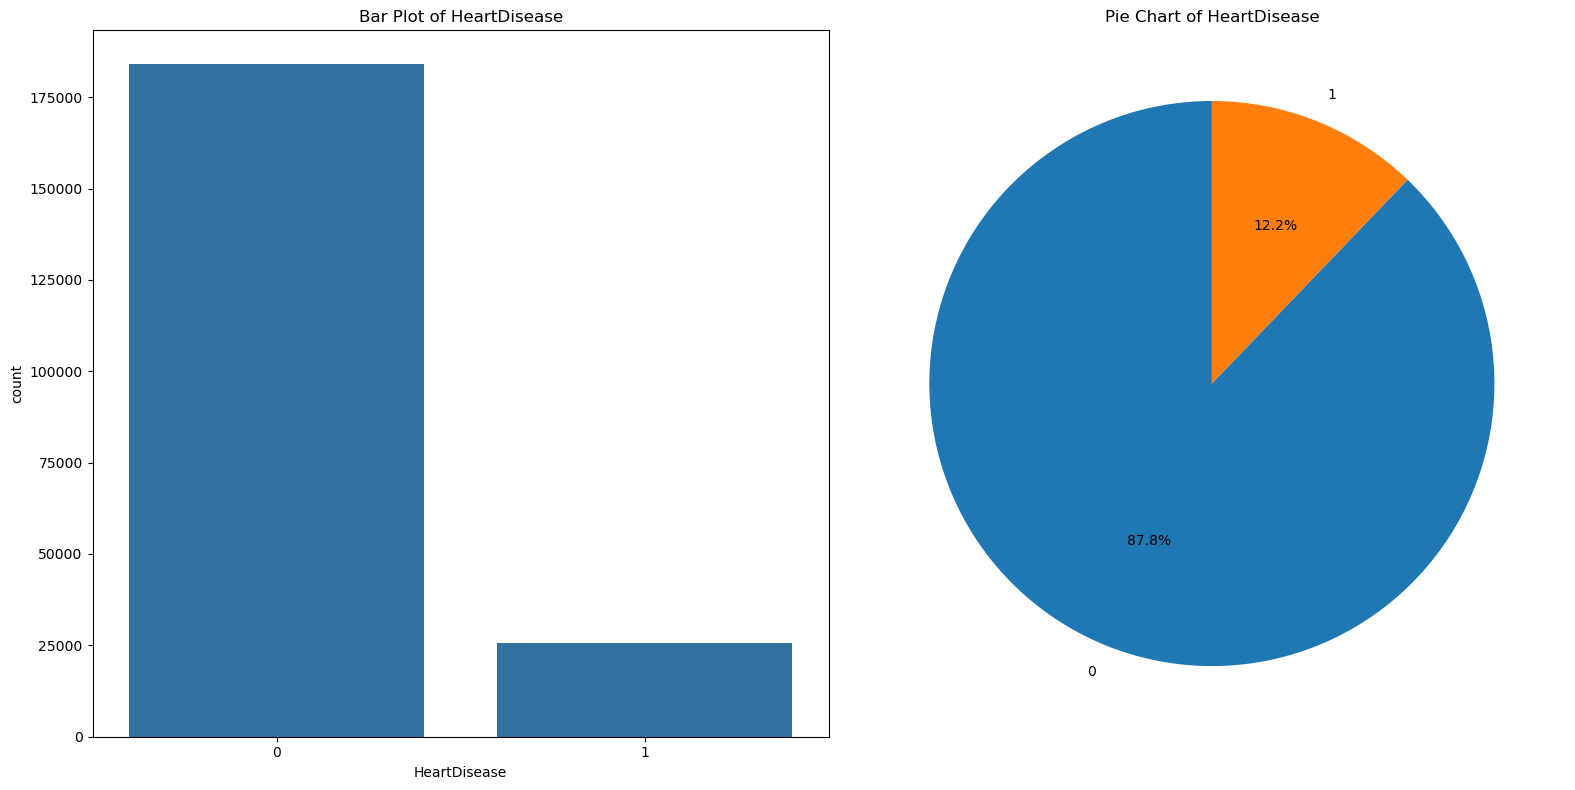

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Bar plot
sns.countplot(x='HeartDisease', data=df_clean, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_clean['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()


----

## Redo the model
After implementing the targeted resampling strategy where 70% of the majority class and 100% of the minority class are retained to balance the dataset, the next crucial step is to retrain or redo our three models. This approach aims to optimize the model's performance in light of the newly balanced data distribution.

### Classification Tree - Remodelling

In [41]:
dectree = DecisionTreeClassifier(max_depth = 5)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

Goodness of Fit
Train Dataset
Classification Accuracy is	 0.8817239569666754
The True Positive Rate is	 0.13684262118315935
The False Positive Rate is	 0.015086806852207684

Test Dataset
Classification Accuracy is	 0.8801106817422832
The True Positive Rate is	 0.12839024390243903
The False Positive Rate is	 0.015191455825203141



<Axes: >

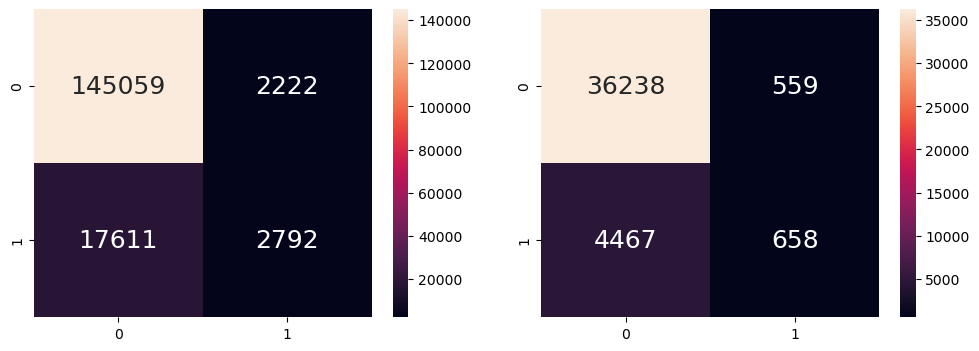

In [43]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

CM1 = confusion_matrix(y_train, y_train_pred)
TN1 = CM1[0][0]
FN1 = CM1[1][0]
TP1 = CM1[1][1]
FP1 = CM1[0][1]
TPR1 = TP1 / (TP1 + FN1)
FPR1 = FP1 / (TN1 + FP1)
TNR1 = TN1 / (TN1 + FP1)
FNR1 = FN1 / (TP1 + FN1)

CM2 = confusion_matrix(y_test, y_test_pred)
TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]
TPR2 = TP2 / (TP2 + FN2)
FPR2 = FP2 / (TN2 + FP2)
TNR2 = TN2 / (TN2 + FP2)
FNR2 = FN2 / (TP2 + FN2)

print("Goodness of Fit")
print("Train Dataset")
print("Classification Accuracy is\t", dectree.score(x_train, y_train))
print("The True Positive Rate is\t", TPR1)
print("The False Positive Rate is\t", FPR1)
#print("The True Negative Rate is\t", TNR1)
#print("The False Negative Rate is\t", FNR1)

print()

print("Test Dataset")
print("Classification Accuracy is\t", dectree.score(x_test, y_test))
print("The True Positive Rate is\t", TPR2)
print("The False Positive Rate is\t", FPR2)
#print("The True Negative Rate is\t", TNR2)
#print("The False Negative Rate is\t", FNR2)
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(CM1,annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(CM2, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<Figure size 4000x4000 with 0 Axes>

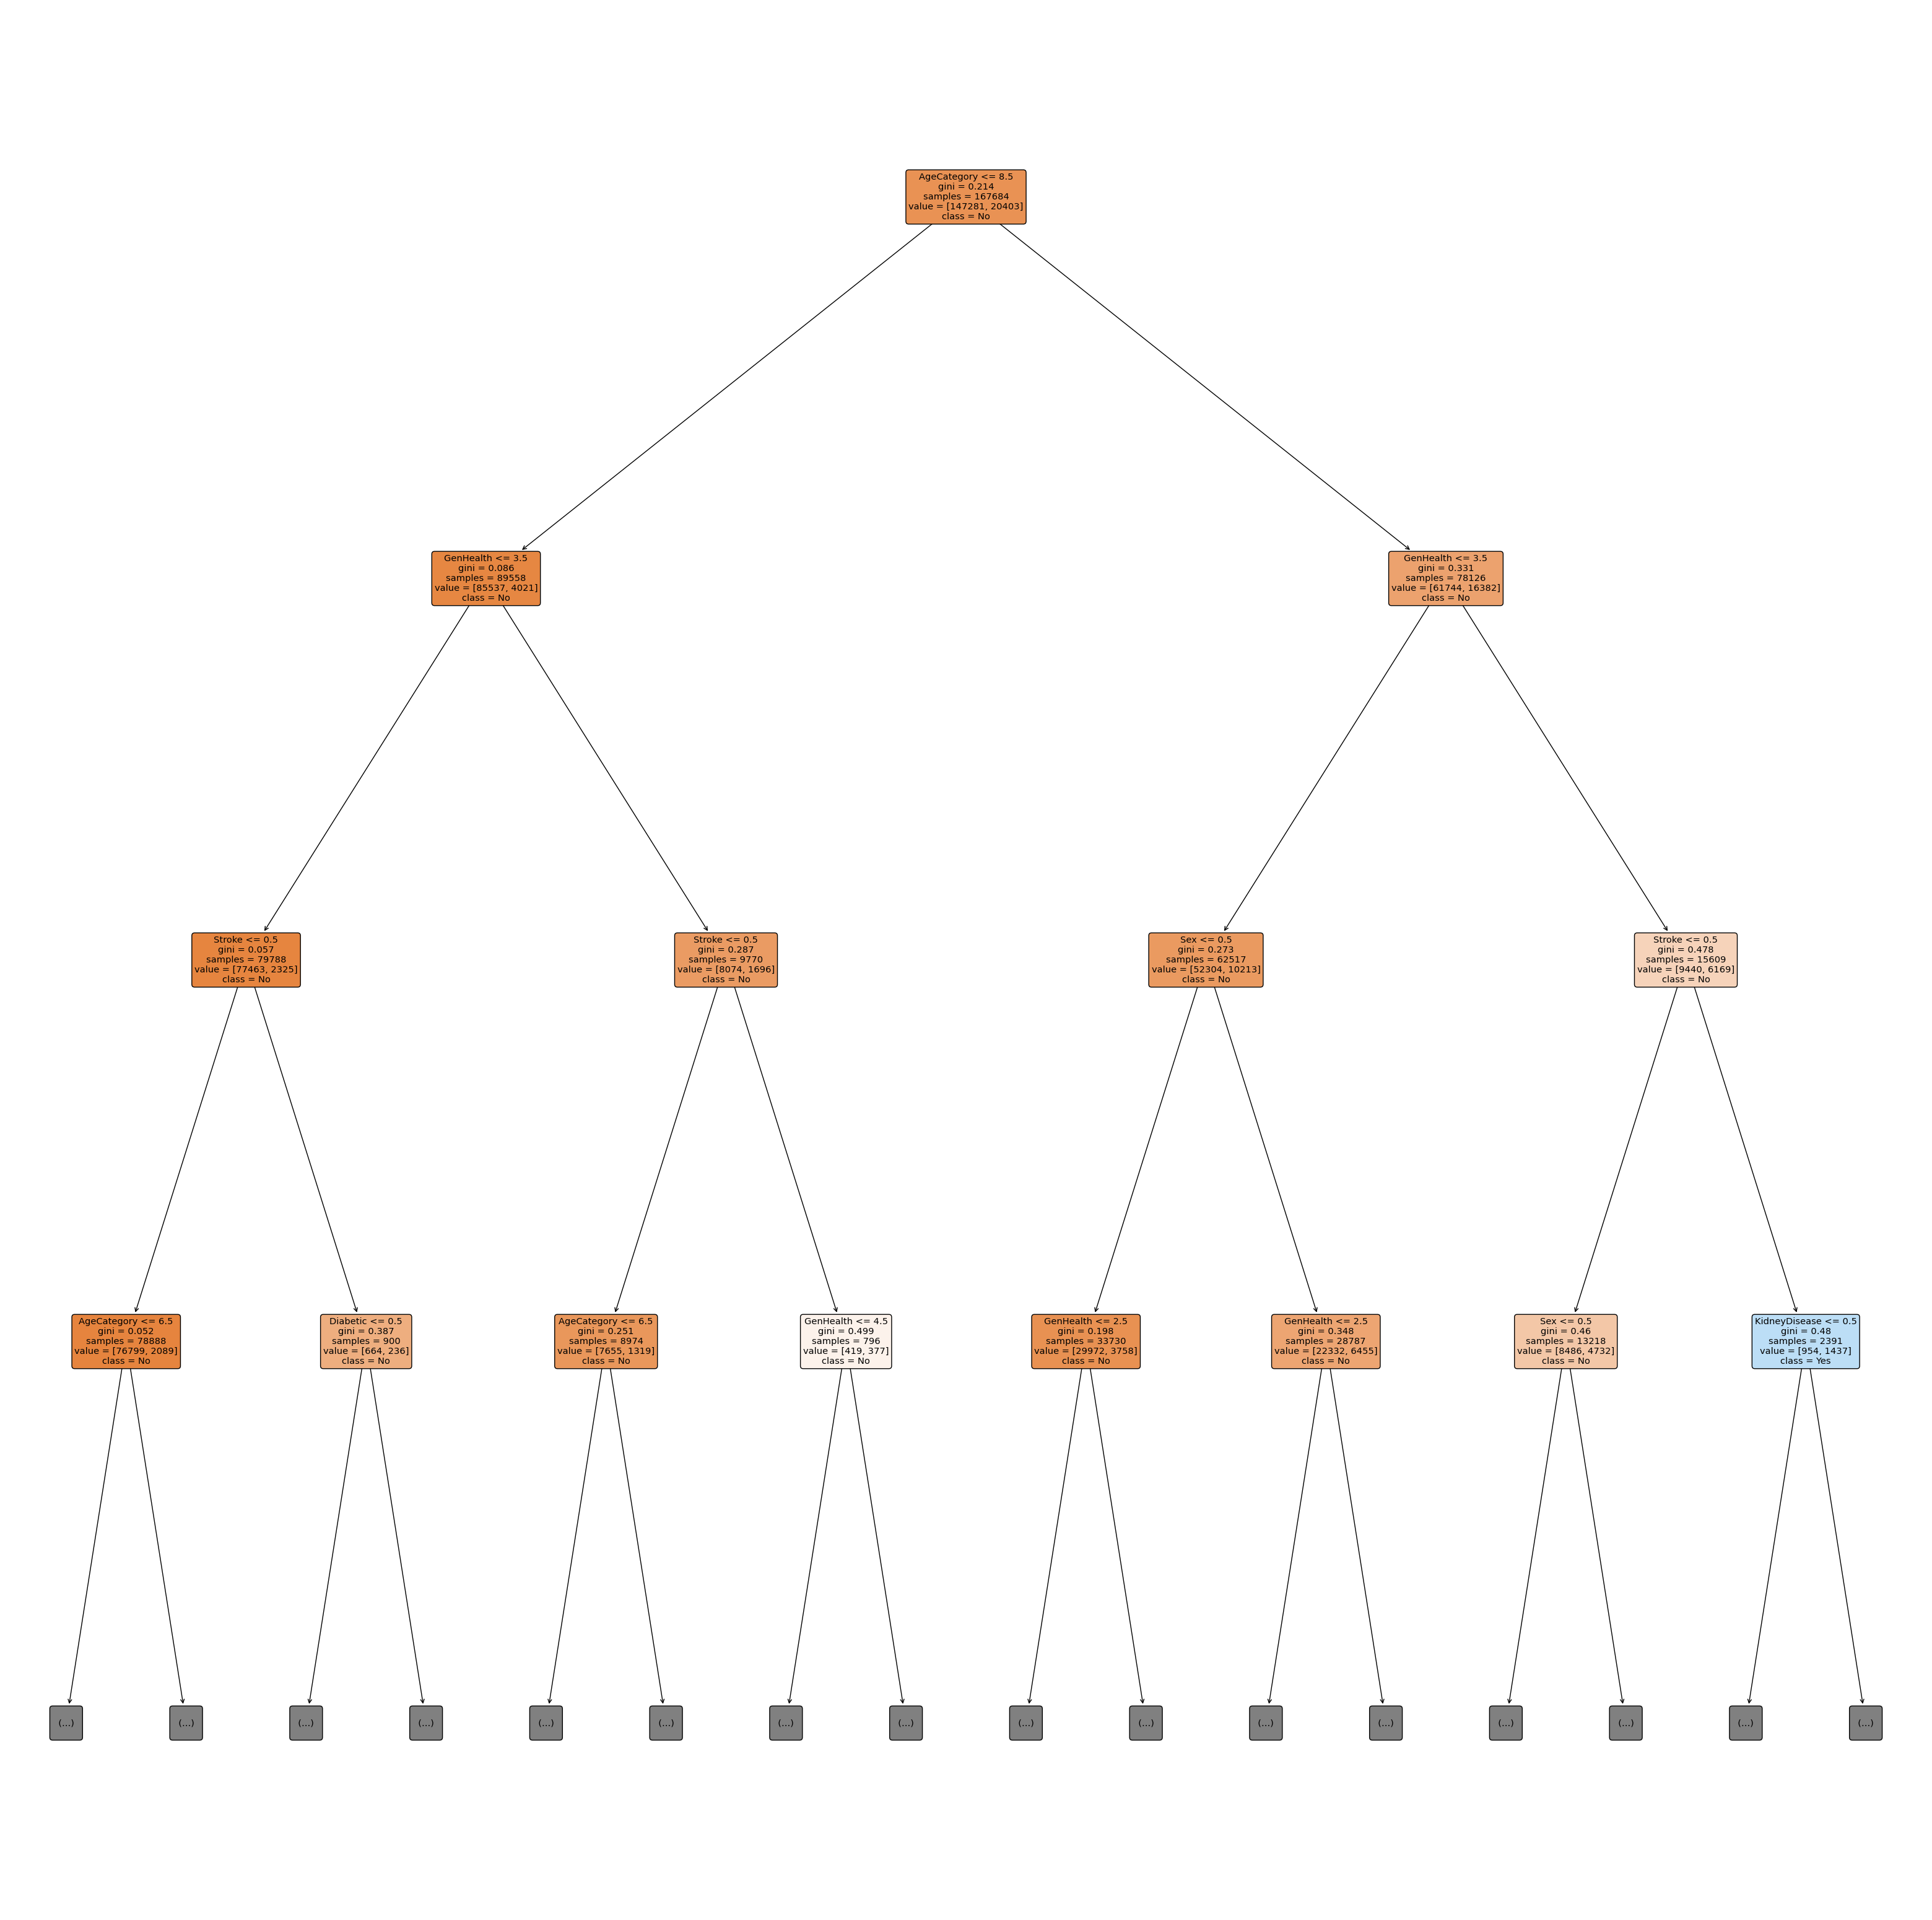

In [44]:
f = plt.figure(figsize=(40,40))
feature_names = x_train.columns.tolist()
with rc_context({'font.size': 20}):
    f = plt.figure(figsize=(40, 40))
    plot_tree(dectree, filled=True, rounded=True, max_depth=3,
              feature_names=feature_names, class_names=['No', 'Yes'])
    plt.show()

----

### Random Forest - Remodelling

In [45]:
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(x_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}\n")

# Analyzing feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Accuracy: 0.8684461619197558

Confusion Matrix:
[[35433  1364]
 [ 4151   974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36797
           1       0.42      0.19      0.26      5125

    accuracy                           0.87     41922
   macro avg       0.66      0.58      0.59     41922
weighted avg       0.84      0.87      0.85     41922


Feature Importances:
 BMI                 0.341890
AgeCategory         0.117496
SleepTime           0.097984
PhysicalHealth      0.075726
GenHealth           0.067757
MentalHealth        0.064378
Race                0.034451
Stroke              0.026878
PhysicalActivity    0.025695
DiffWalking         0.024122
Sex                 0.022388
Asthma              0.020094
Diabetic            0.019958
Smoking             0.019930
SkinCancer          0.017535
KidneyDisease       0.014029
AlcoholDrinking     0.009690
dtype: float64


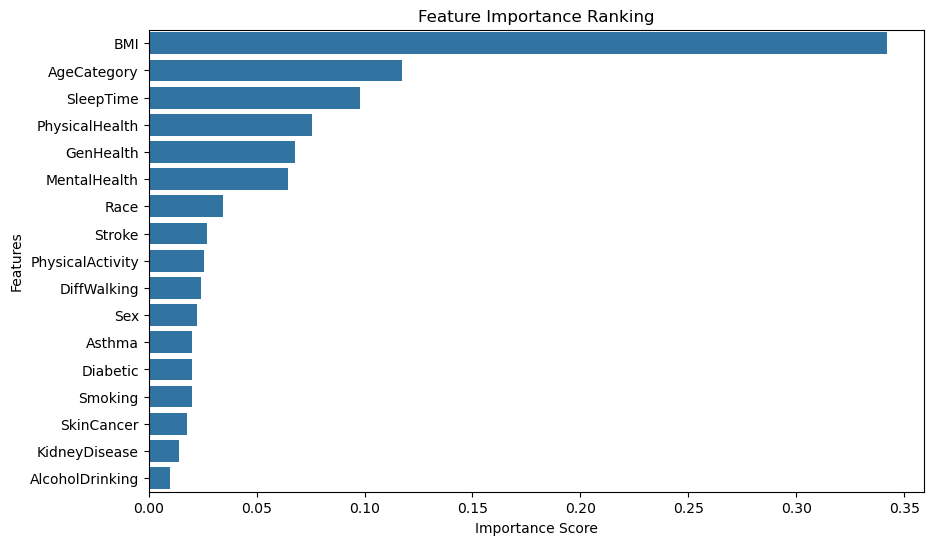

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

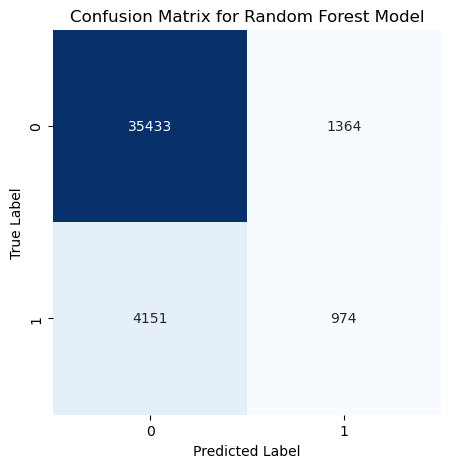

In [47]:
# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

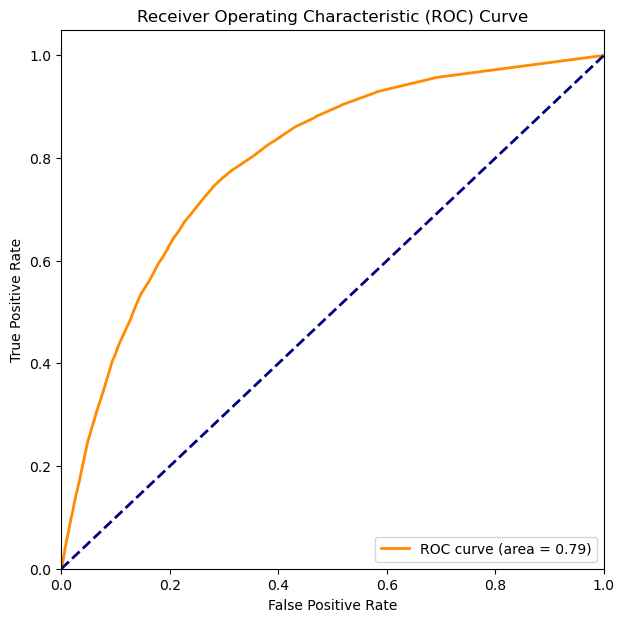

In [48]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = random_forest_model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)  # Ensure auc is callable from sklearn.metrics and not overwritten

# Plotting the ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Using f-string for clarity
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


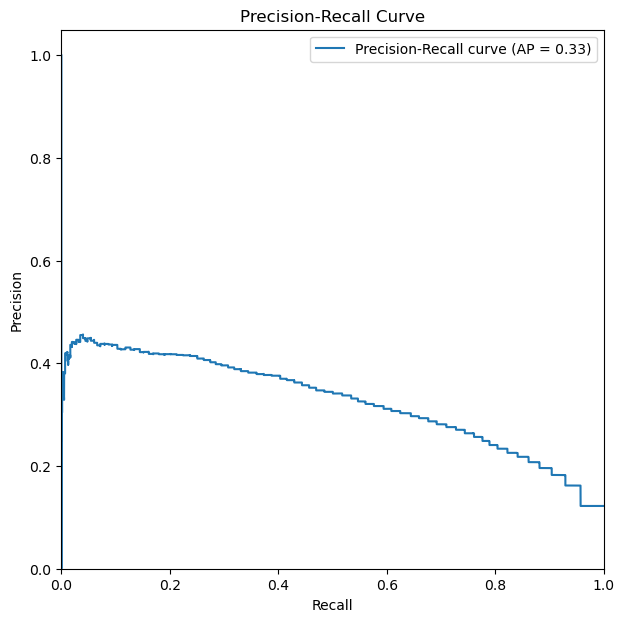

In [49]:
y_score = random_forest_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(7, 7))
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

----

### Neural Network - Remodelling


Training for fold 1 ...
Epoch 1/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - binary_accuracy: 0.8522 - loss: 0.3652
Epoch 2/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 680us/step - binary_accuracy: 0.8805 - loss: 0.2953
Epoch 3/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 679us/step - binary_accuracy: 0.8805 - loss: 0.2930
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
Score for fold 1: loss of 0.2880880534648895; compile_metrics of 88.30843567848206%

Training for fold 2 ...
Epoch 1/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - binary_accuracy: 0.8507 - loss: 0.3655
Epoch 2/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 690us/step - binary_accuracy: 0.8797 - loss: 0.2963
Epoch 3/3
4193/4193 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - binary_accuracy: 0.8812 - loss: 0.2911
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
Score for fold 2: loss of 0.29486894607543945; compile_metrics of 88.1742537021637%

Training for fold 3 ...
Ep

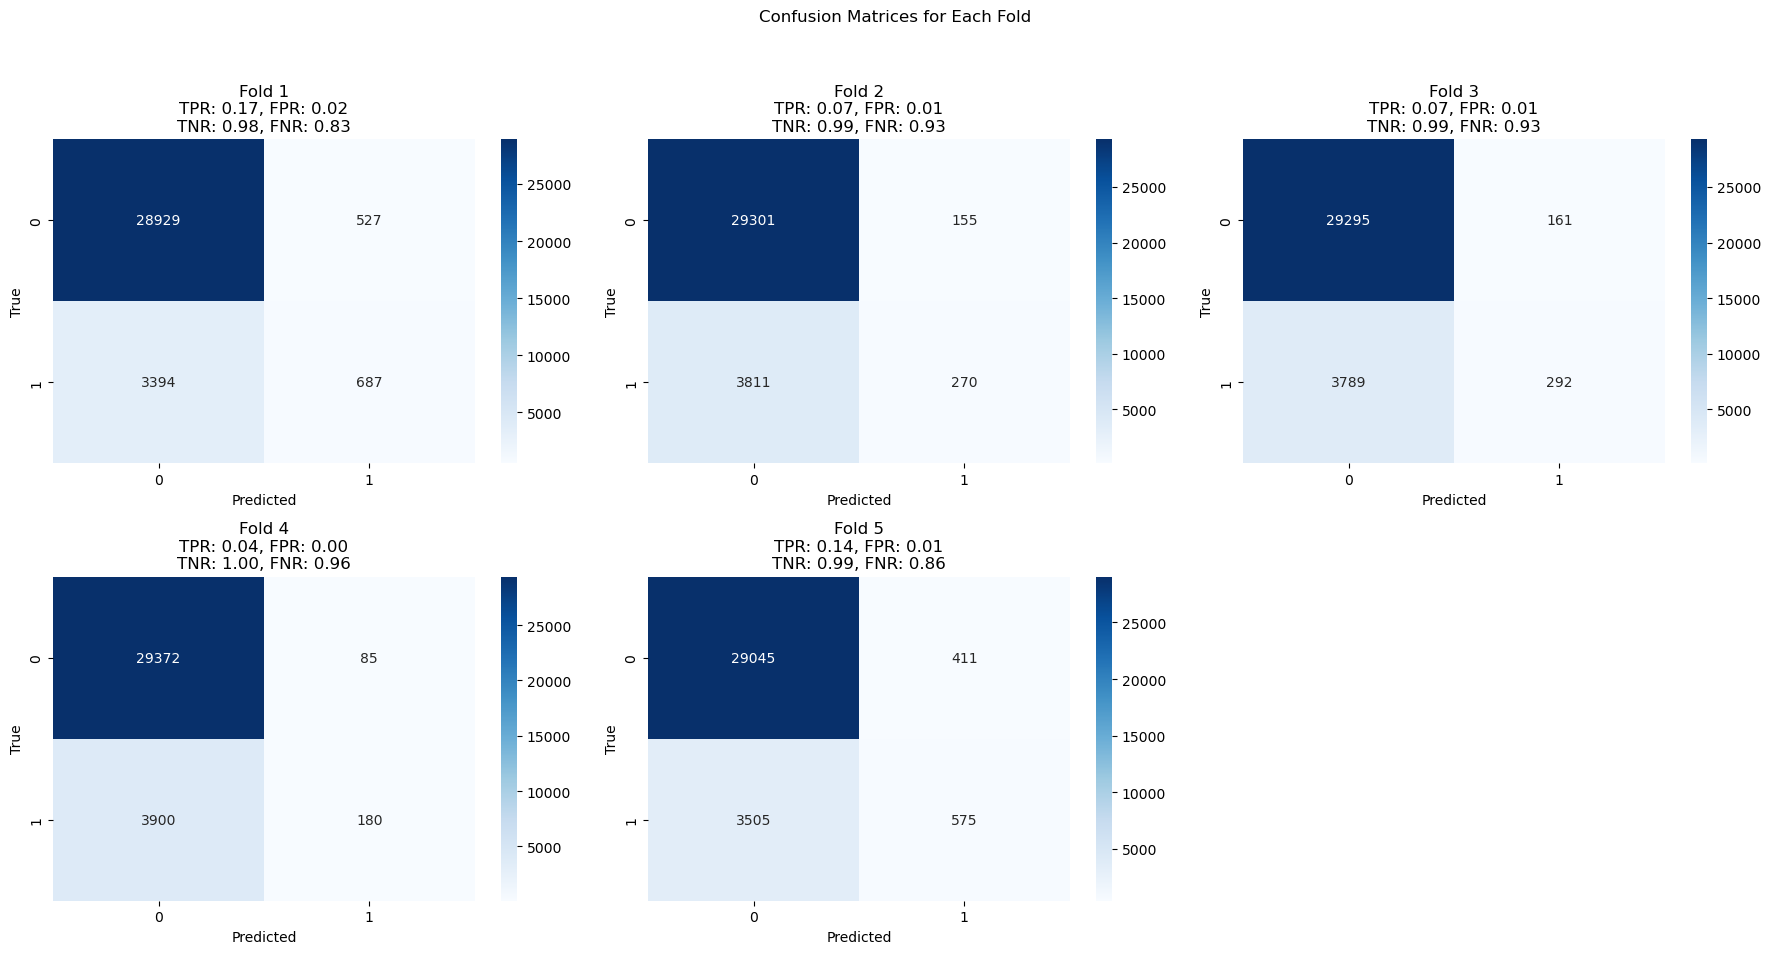

In [50]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

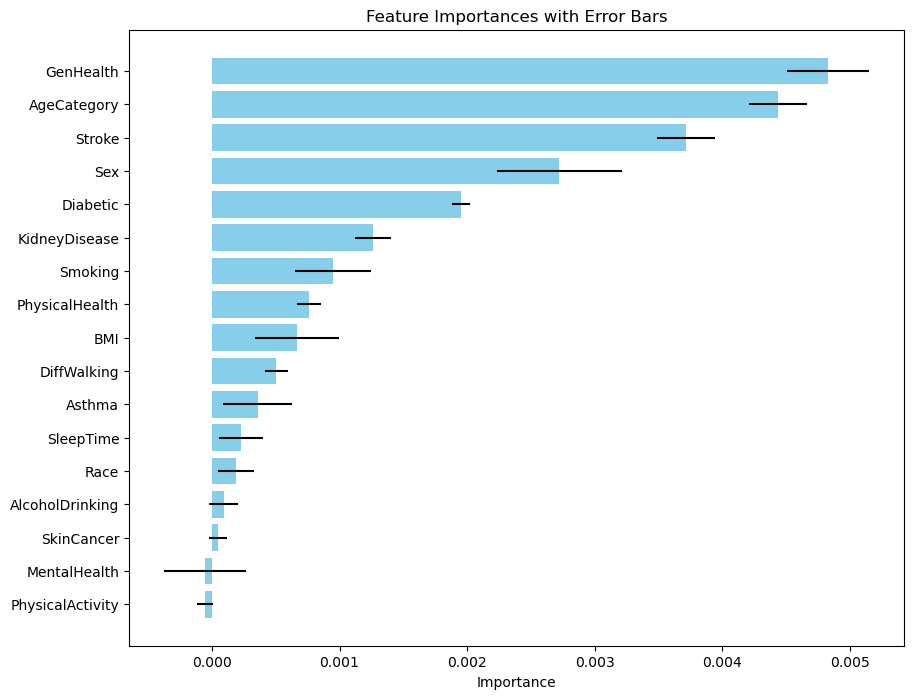

In [52]:
# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy

# Wrap your model
wrapped_model = KerasClassifierWrapper(model)

perm = PermutationImportance(wrapped_model, random_state=1).fit(x_test, y_test)
importances = perm.feature_importances_
std = perm.feature_importances_std_

feature_names = x_train.columns.tolist()

data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort data by importance for better visualization
data_sorted = data.sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Feature'], data_sorted['Importance'], xerr=data_sorted['Std'], align='center', color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances with Error Bars')
plt.show()

# Resampling
Implementing resampling techniques in our heart disease prediction project aims to correct the class imbalance in our dataset. By adjusting the dataset composition, we strive to provide a more balanced scenario for our predictive models, enhancing their accuracy and generalizability.This will help correct any class imbalances present due to disproportionate numbers of cases within the dataset (e.g., more non-disease instances than disease instances), thereby improving our heart disease models' predictive accuracy and reliability.

1. Balanced Data Representation: Our dataset, characterized by variables such as BMI, smoking habits, alcohol consumption, and other health metrics, likely exhibits an imbalance in the prevalence of heart disease outcomes. Resampling will ensure that both outcomes (heart disease: yes and no) are adequately represented, allowing the model to learn to identify indicators of heart disease effectively.
2. Enhanced Model Performance: Imbalance can lead to models that are biased towards the majority class, potentially overlooking critical patterns related to the minority class (patients with heart disease). By using techniques like SMOTE for oversampling the minority class or random undersampling of the majority class, we can enhance key performance metrics such as sensitivity (recall) and specificity.

Integrating resampling techniques into our predictive modeling framework will lead to a more balanced, fair, and accurate model for heart disease prediction. This adjusted model will improve clinical decision-making processes by providing more reliable predictions across all patient groups, thereby enhancing the effectiveness of interventions and preventive measures for heart disease based on insights drawn from a well-balanced dataset.

## Oversampling
Demonstrates a comprehensive implementation of SMOTE (Synthetic Minority Over-sampling Technique) for addressing class imbalance in a dataset used for predicting heart disease. It then follows through with model training and evaluation using a neural network across stratified k-fold cross-validation. Here’s a detailed breakdown and analysis of the process

Before SMOTE:
Yes: 20403
No: 147281

After SMOTE:
Yes: 147281
No: 147281


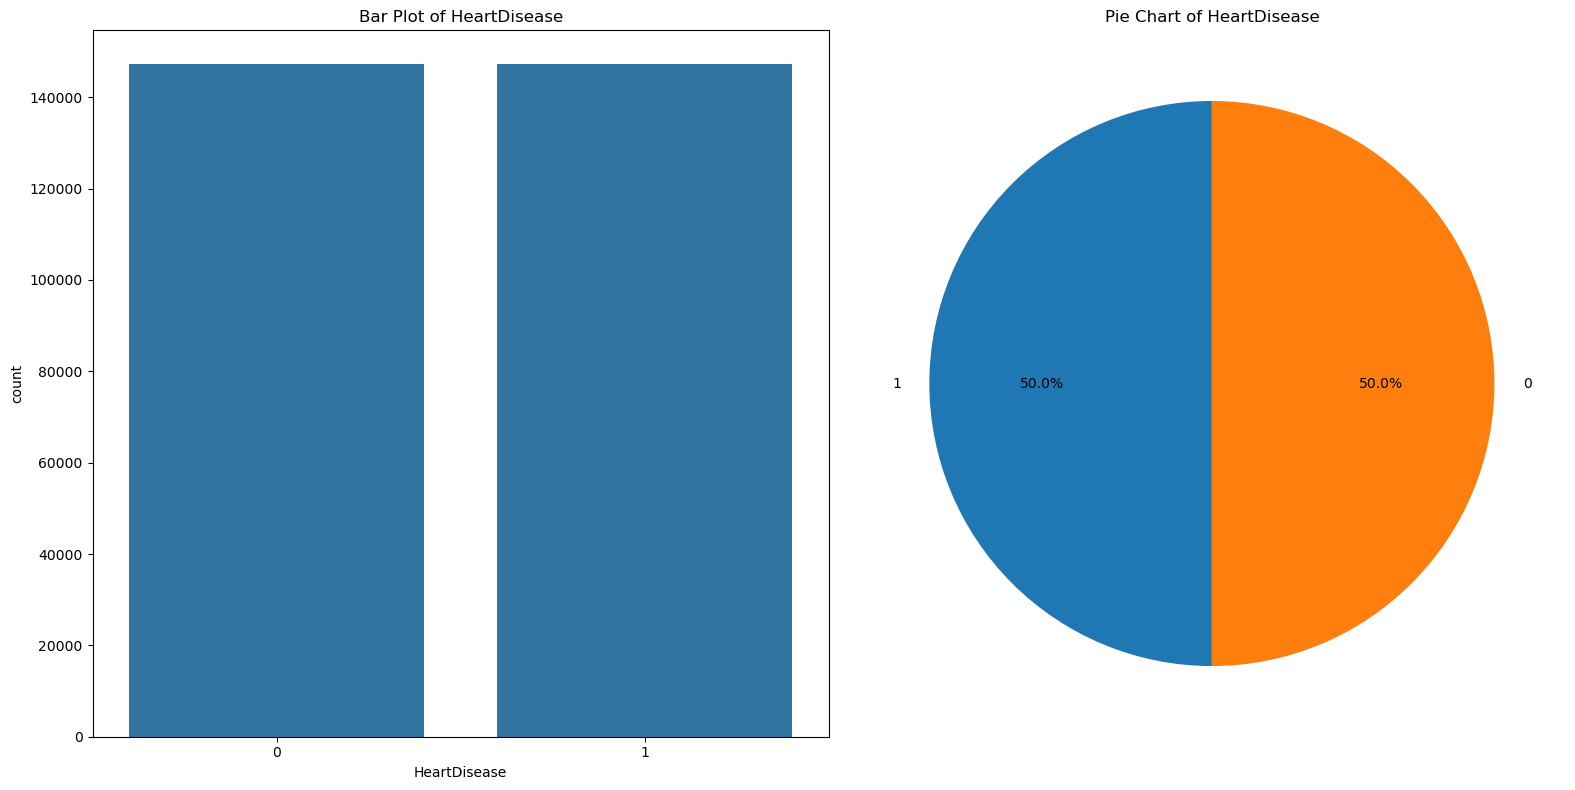

In [53]:
from imblearn.over_sampling import SMOTE

x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

counts_before = y_train.value_counts()
print("Before SMOTE:")
print(f"Yes: {counts_before.get(1, 0)}")  # get(1, 0) returns the count of '1' (yes), defaults to 0 if not present
print(f"No: {counts_before.get(0, 0)}")  # get(0, 0) returns the count of '0' (no), defaults to 0 if not present

print()
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
x_train, y_train = smote.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After SMOTE:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 678us/step - binary_accuracy: 0.7150 - loss: 0.5703
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 688us/step - binary_accuracy: 0.7389 - loss: 0.5319
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 681us/step - binary_accuracy: 0.7392 - loss: 0.5262
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 1: loss of 0.519558846950531; compile_metrics of 74.63548183441162%

Training for fold 2 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 683us/step - binary_accuracy: 0.7188 - loss: 0.5682
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 688us/step - binary_accuracy: 0.7383 - loss: 0.5302
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 684us/step - binary_accuracy: 0.7411 - loss: 0.5249
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 262us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 2: loss of 0.5206208229064941; compile_metrics of 74.61001873016357%

Training for fold 3 ...
Epo

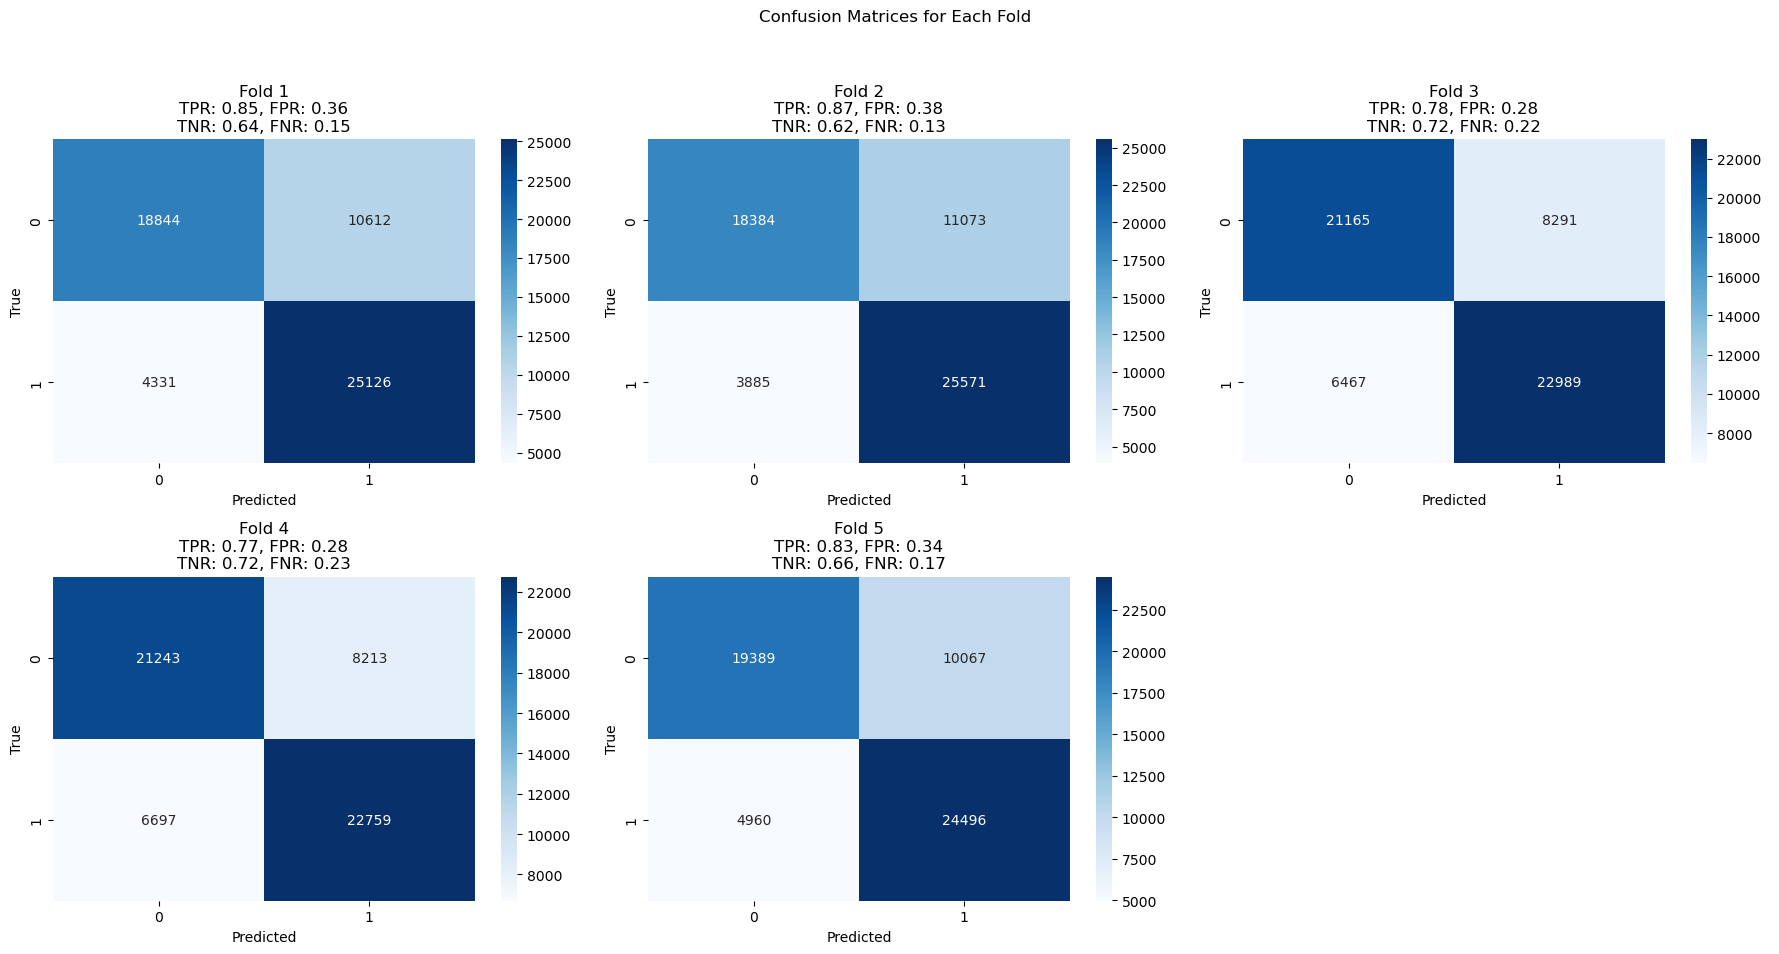

In [54]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

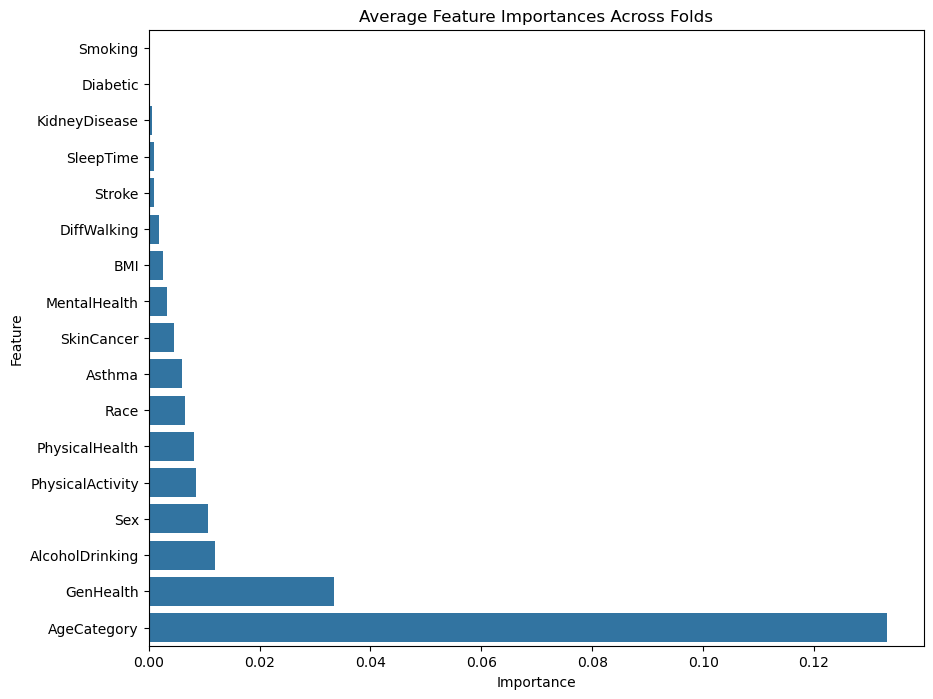

In [55]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

Before:
Yes: 20403
No: 147281
After Undersampling the Majority Class:
Yes: 20403
No: 20403


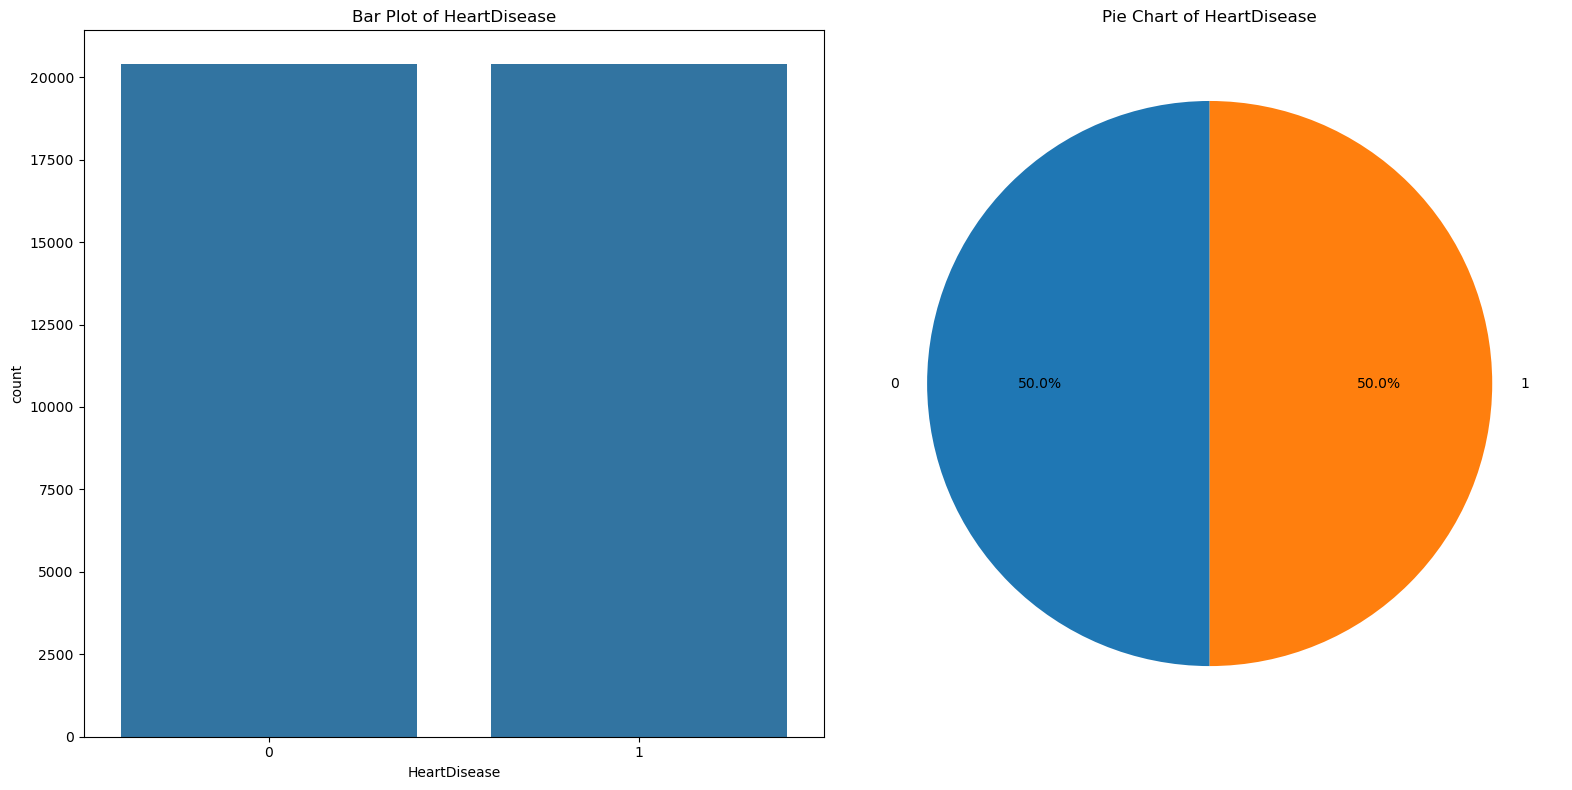

In [56]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Resample the training data
x_train, y_train = rus.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After Undersampling the Majority Class:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - binary_accuracy: 0.6977 - loss: 0.6283
Epoch 2/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - binary_accuracy: 0.7463 - loss: 0.5263
Epoch 3/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - binary_accuracy: 0.7439 - loss: 0.5201
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
Score for fold 1: loss of 0.5144352912902832; compile_metrics of 74.45479035377502%

Training for fold 2 ...
Epoch 1/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - binary_accuracy: 0.7016 - loss: 0.6175
Epoch 2/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - binary_accuracy: 0.7419 - loss: 0.5297
Epoch 3/3
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - binary_accuracy: 0.7437 - loss: 0.5230
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Score for fold 2: loss of 0.49436113238334656; compile_metrics of 75.57897567749023%

Training for fold 3 ...
Epoch 1/3

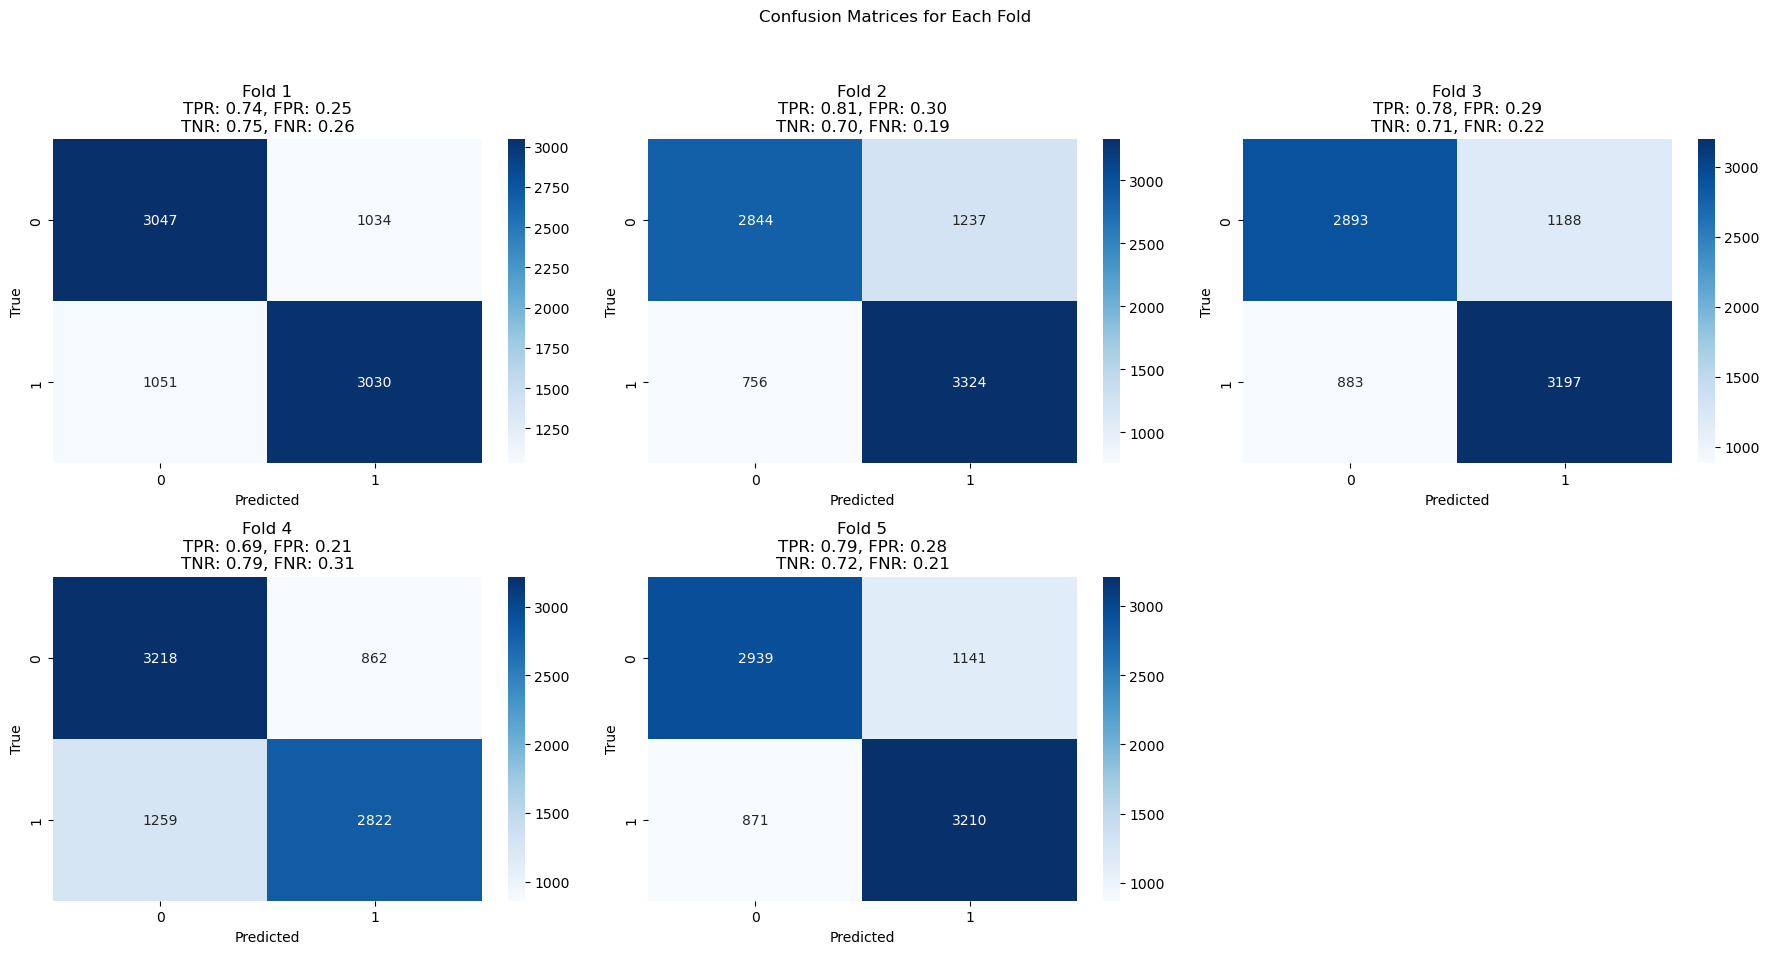

In [57]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

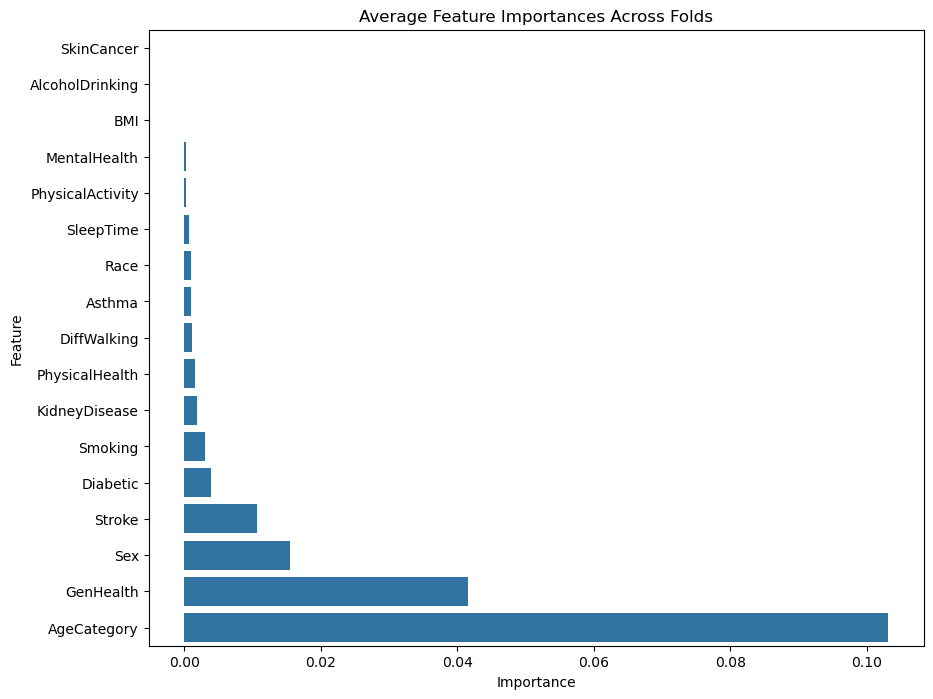

In [58]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

## combination of both oversampling the minority and undersampling the majority

The goal is to apply a combination of over-sampling the minority class (patients with heart disease) and under-sampling the majority class (patients without heart disease) to create a balanced dataset that maintains the integrity and diversity of the original data. This balanced dataset will then be used to train a predictive model to accurately identify the presence of heart disease.

Before:
Yes: 20403
No: 147281
After smt:
Yes: 145818
No: 145818


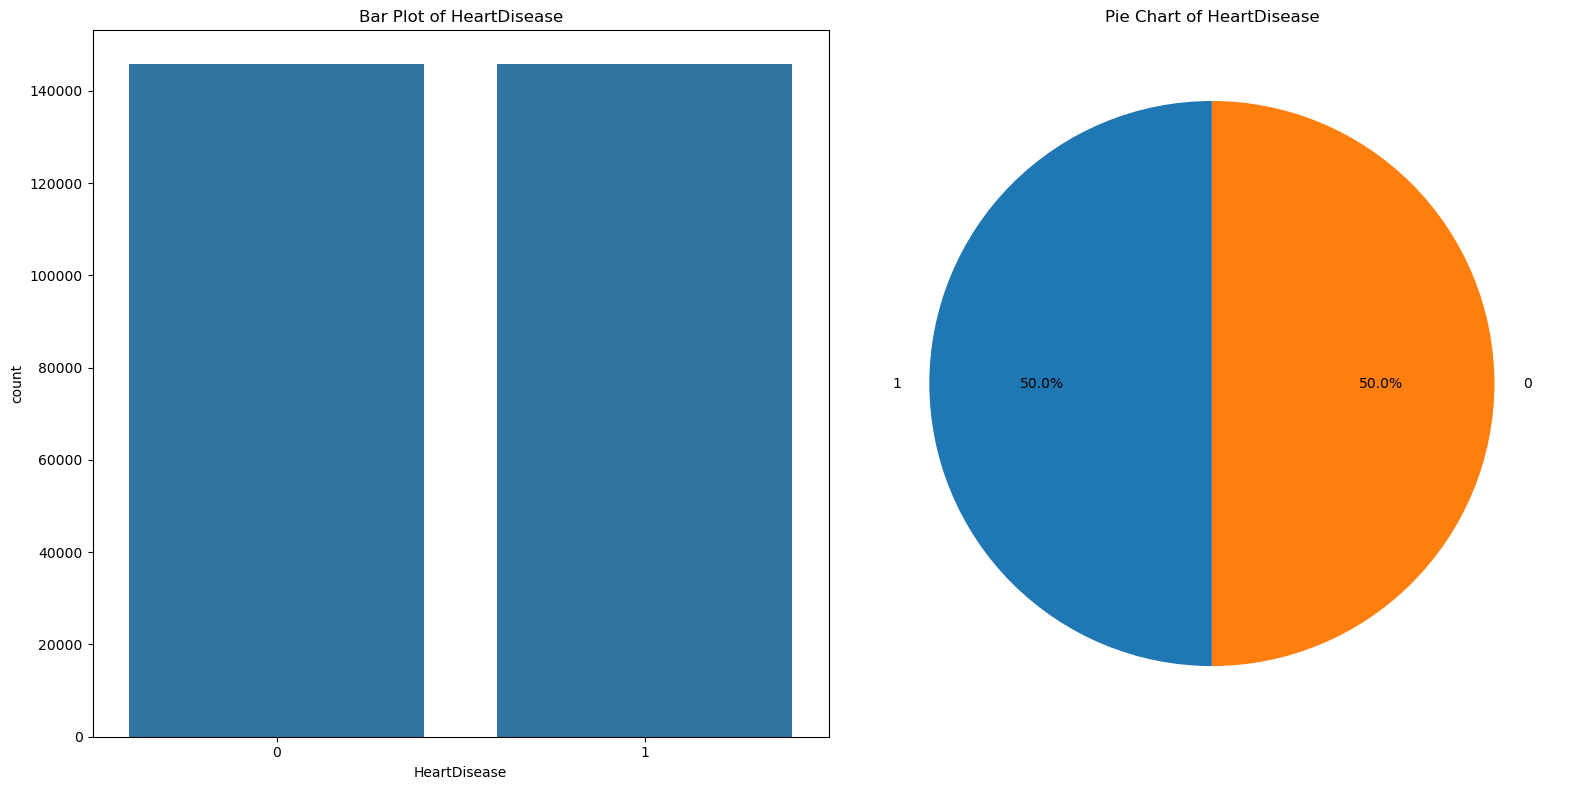

In [59]:
from imblearn.combine import SMOTETomek

x,y = df_clean.drop(["HeartDisease"], axis=1), df_clean["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

counts_before = y_train.value_counts()
print("Before:")
print(f"Yes: {counts_before.get(1, 0)}")  # get(1, 0) returns the count of '1' (yes), defaults to 0 if not present
print(f"No: {counts_before.get(0, 0)}")  # get(0, 0) returns the count of '0' (no), defaults to 0 if not present

# Create a SMOTETomek object (which combines SMOTE and Tomek links for cleaning)
smt = SMOTETomek(random_state=42)

# Resample the training data
x_train, y_train = smt.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After smt:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Training for fold 1 ...
Epoch 1/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 6s 684us/step - binary_accuracy: 0.7214 - loss: 0.5658
Epoch 2/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 687us/step - binary_accuracy: 0.7404 - loss: 0.5276
Epoch 3/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 703us/step - binary_accuracy: 0.7385 - loss: 0.5269
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
Score for fold 1: loss of 0.5140590667724609; compile_metrics of 75.03085732460022%

Training for fold 2 ...
Epoch 1/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 6s 714us/step - binary_accuracy: 0.7231 - loss: 0.5624
Epoch 2/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step - binary_accuracy: 0.7415 - loss: 0.5263
Epoch 3/3
7291/7291 ━━━━━━━━━━━━━━━━━━━━ 5s 713us/step - binary_accuracy: 0.7407 - loss: 0.5277
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Score for fold 2: loss of 0.5137571692466736; compile_metrics of 74.82298016548157%

Training for fold 3 ...
Ep

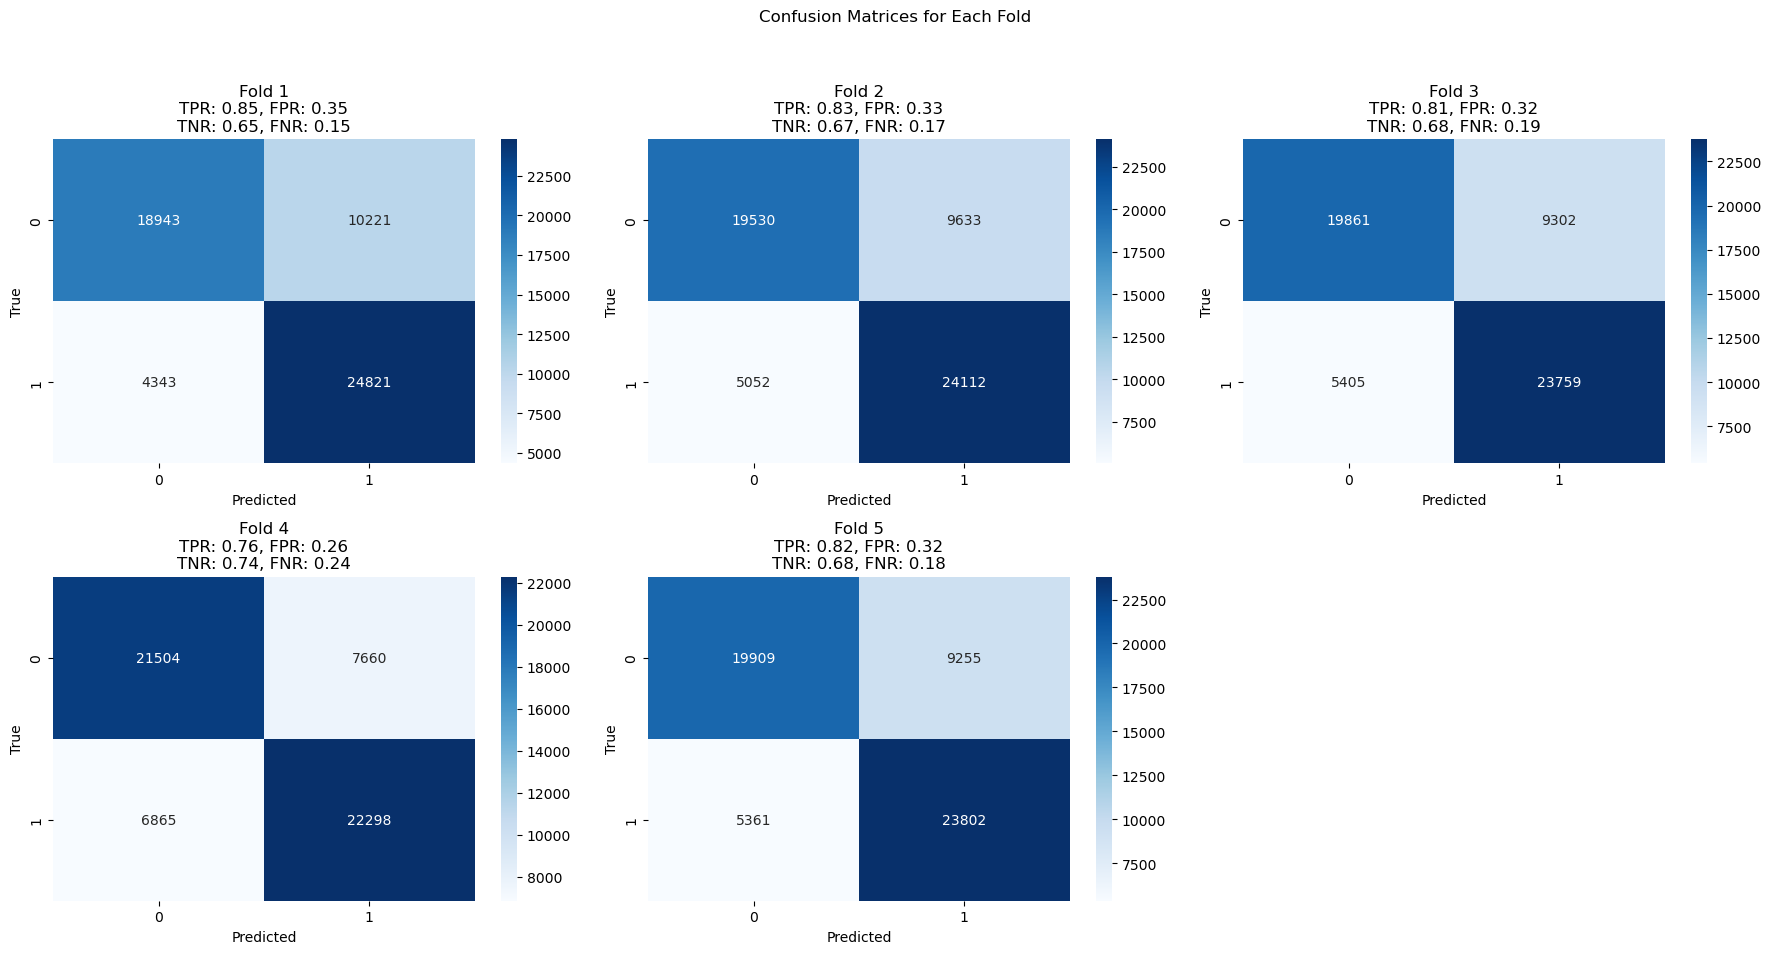

In [60]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

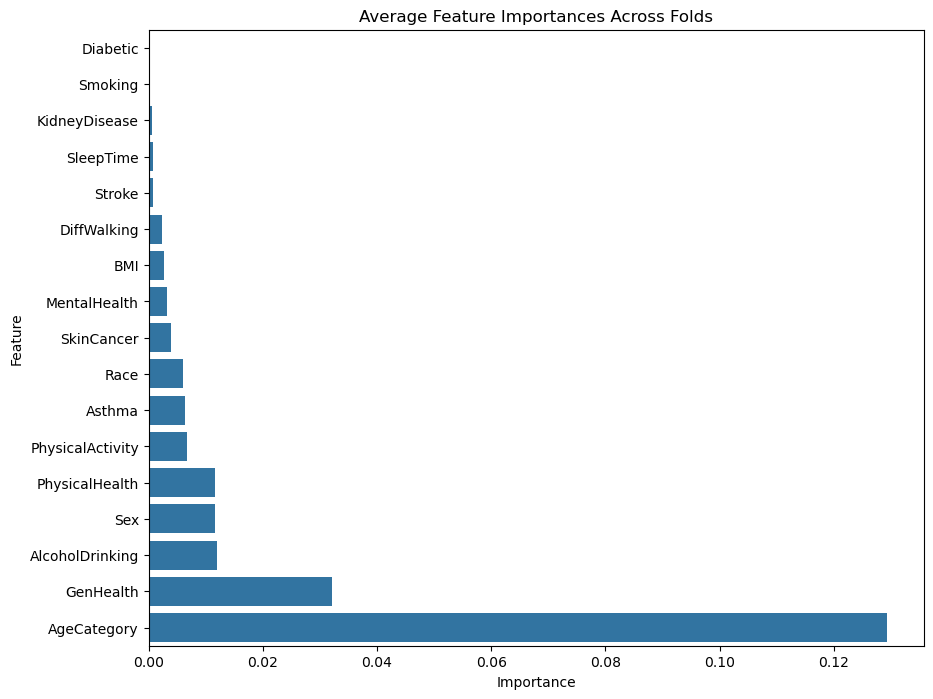

In [61]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

----

# K mean SMOTE
K-means SMOTE is an advanced synthetic over-sampling technique that integrates the K-means clustering algorithm into the SMOTE process to generate synthetic samples. This method is particularly effective in addressing class imbalance in complex datasets by focusing on creating synthetic samples within coherent clusters rather than across the entire minority class distribution. This can improve the quality of synthetic data and lead to better model performance, especially in domains like medical diagnosis where the underlying data patterns are intricate.

1. Data Preparation:
Ensure that the dataset is cleaned, normalized, and ready for processing. This includes handling missing values, encoding categorical variables, and scaling numerical features to ensure uniformity.
2. Applying K-means SMOTE:
Use K-means SMOTE to over-sample the minority class (patients with heart disease). This technique involves clustering the minority class using the K-means algorithm and then applying the SMOTE technique within these clusters to generate synthetic samples.
3.Model Training:
Train a predictive model using the balanced dataset obtained from the K-means SMOTE process. Given the enhanced quality of the synthetic samples, the model is better positioned to learn accurate and generalizable patterns.
4. Cross-Validation:
Implement stratified k-fold cross-validation to evaluate the model’s performance. This approach helps verify the model’s effectiveness across different subsets of the data and ensures robustness and reliability.
5. Performance Evaluation:
Assess the model using various metrics such as accuracy, precision, recall, F1-score, and AUC. These metrics provide a comprehensive view of the model’s capabilities and its practical applicability in clinical settings.

After K mean SMOTE:
Yes: 20403
No: 147281


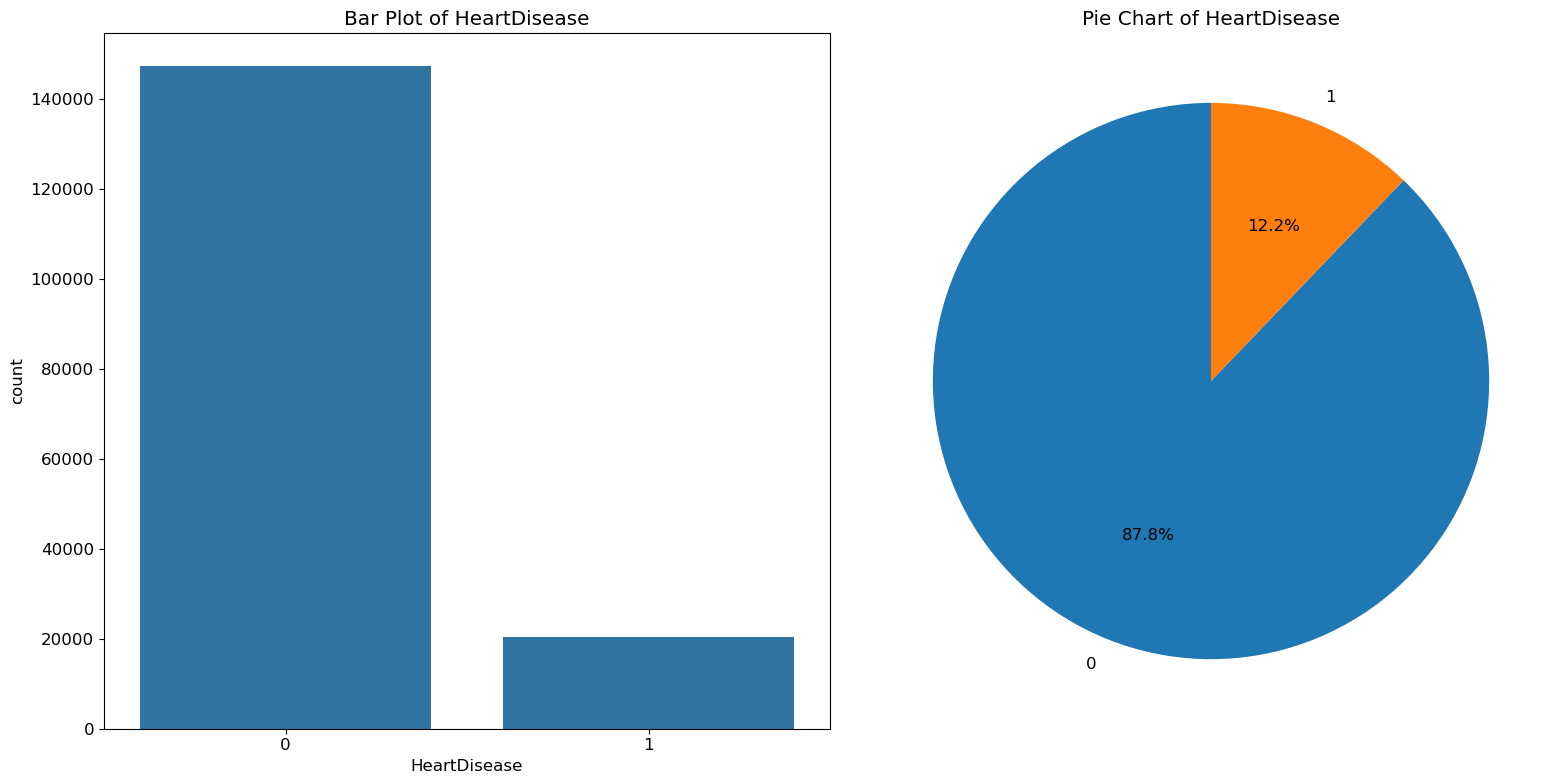

In [121]:

KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)

x_resampled, y_resampled  = KSMOTE.fit_resample(x_train, y_train)

counts_after = y_train.value_counts()
print("After K mean SMOTE:")
print(f"Yes: {counts_after.get(1, 0)}")
print(f"No: {counts_after.get(0, 0)}")

f, axes = plt.subplots(1, 2, figsize=(16, 8))  # Use 2 subplots for bar and pie charts

# Prepare a DataFrame from the resampled data for easier plotting
df_heart = pd.DataFrame(x_train, columns=x_train.columns)
df_heart['HeartDisease'] = y_train

# Bar plot
sns.countplot(x='HeartDisease', data=df_heart, ax=axes[0])
axes[0].set_title('Bar Plot of HeartDisease')

# Pie chart
heart_disease_counts = df_heart['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of HeartDisease')
axes[1].set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

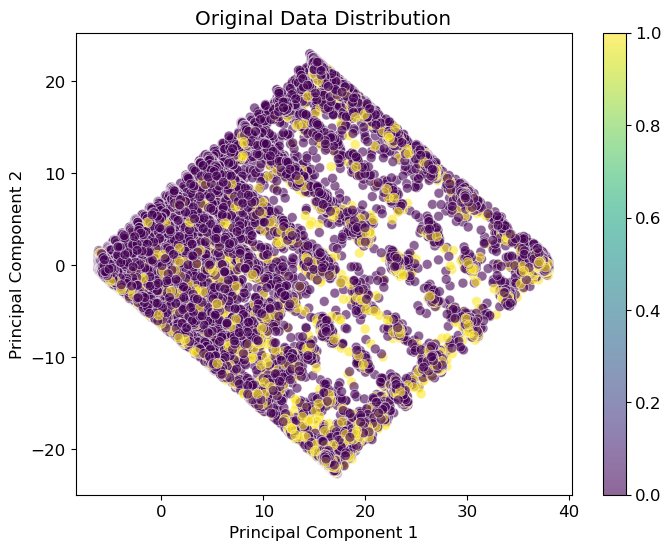

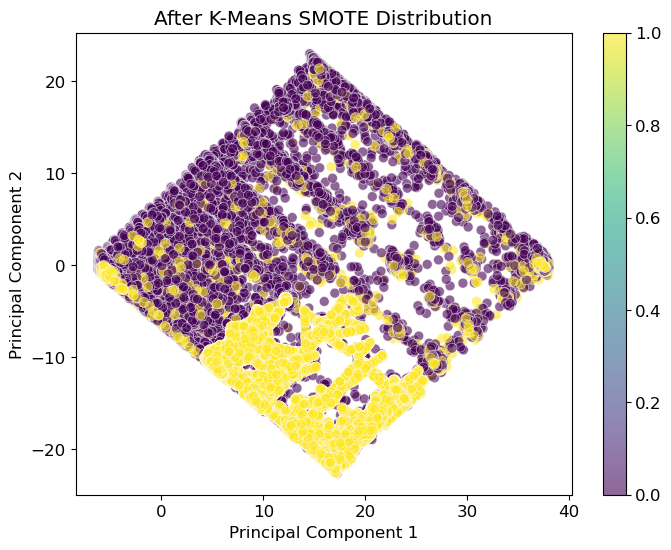

In [122]:
from sklearn.decomposition import PCA  # For dimensionality reduction

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy plotting
x_original_pca = pca.fit_transform(x_train)
x_resampled_pca = pca.transform(x_resampled)

# Function to plot the data
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, cmap='viridis',
                          edgecolors='w', s=50, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter)
    plt.show()

# Visualize original data
plot_data(x_original_pca, y_train, 'Original Data Distribution')

# Visualize data after K-Means SMOTE
plot_data(x_resampled_pca, y_resampled, 'After K-Means SMOTE Distribution')

Training for fold 1 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 701us/step - binary_accuracy: 0.9006 - loss: 0.2855
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 693us/step - binary_accuracy: 0.9091 - loss: 0.2574
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 719us/step - binary_accuracy: 0.9088 - loss: 0.2572
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step
Score for fold 1: loss of 0.23767557740211487; compile_metrics of 91.59098863601685%

Training for fold 2 ...
Epoch 1/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 6s 709us/step - binary_accuracy: 0.8997 - loss: 0.2879
Epoch 2/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 706us/step - binary_accuracy: 0.9091 - loss: 0.2571
Epoch 3/3
7365/7365 ━━━━━━━━━━━━━━━━━━━━ 5s 705us/step - binary_accuracy: 0.9107 - loss: 0.2567
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
Score for fold 2: loss of 0.24561455845832825; compile_metrics of 91.31600856781006%

Training for fold 3 ...


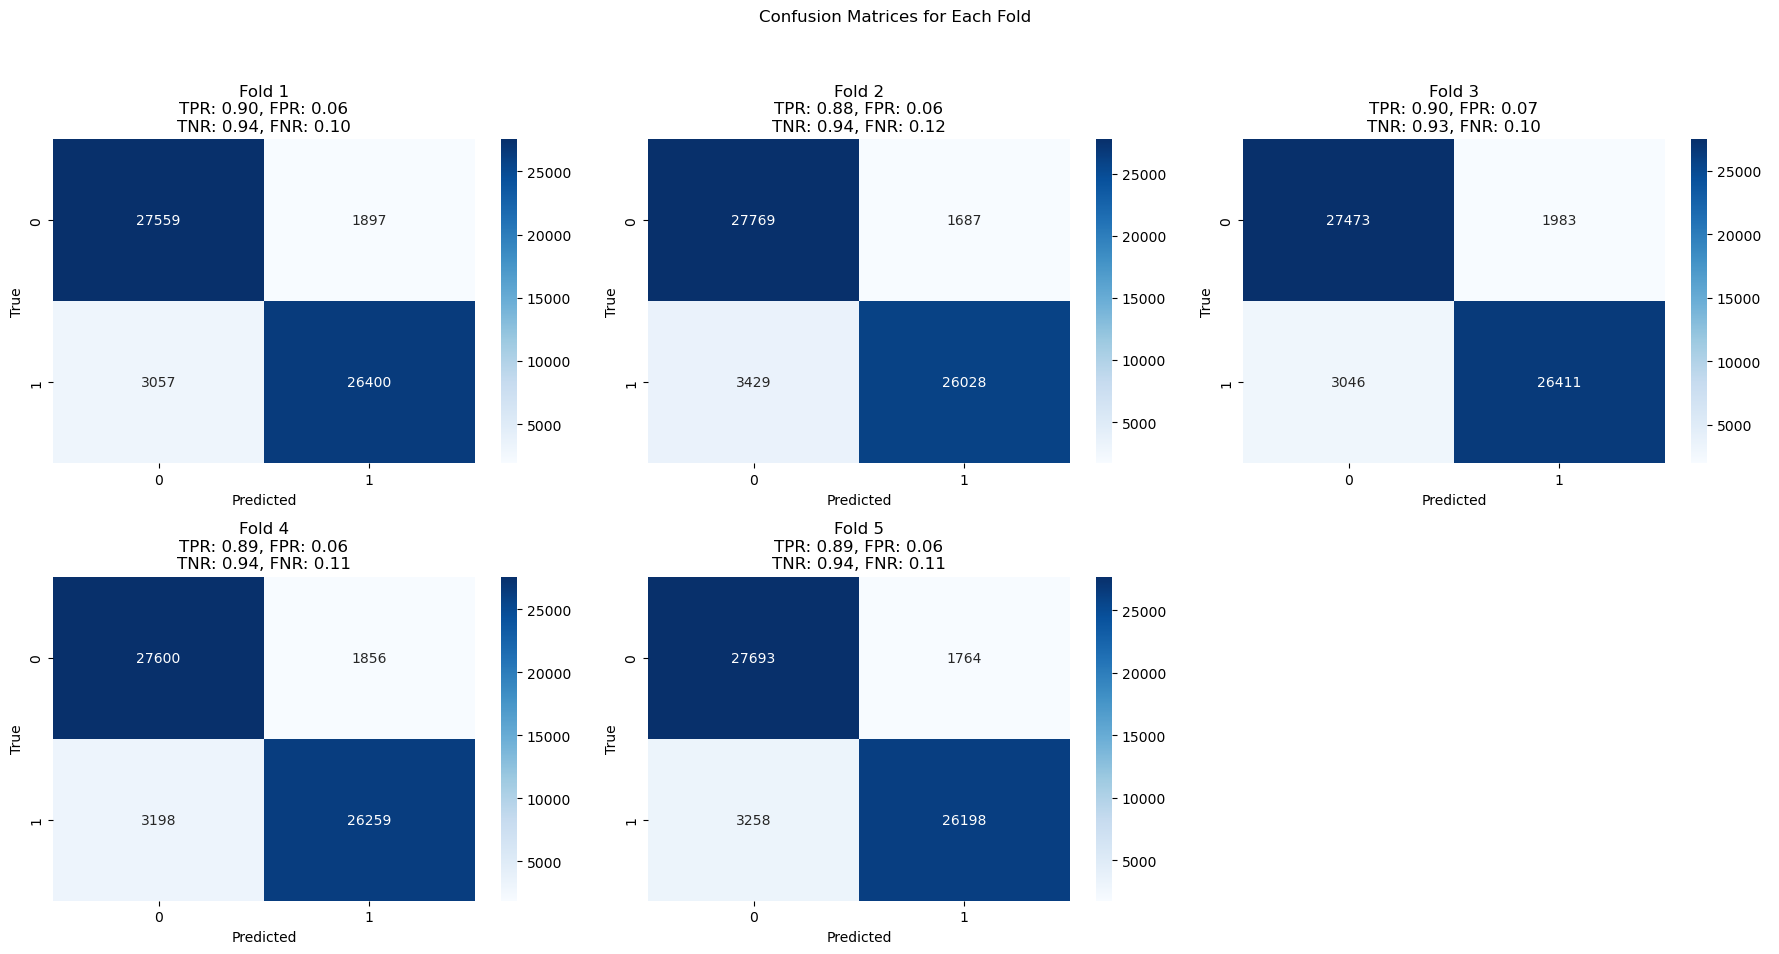

In [63]:
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []
# List to store confusion matrices
confusion_matrices = []
tpr_list = []  # List to store True Positive Rates
fpr_list = []  # List to store False Positive Rates
tnr_list = []  # List to store True Negative Rates
fnr_list = []  # List to store False Negative Rates

precision_list = []
recall_list = []
f1_score_list = []
auc_list = []

all_importances = pd.DataFrame()

# Define a wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        # You can add fitting logic here if needed
        return self

    def score(self, X, y):
        loss, accuracy = self.keras_model.evaluate(X, y, verbose=0)
        return accuracy


# Get feature names
feature_names = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

for train, test in kfold.split(x_train, y_train):
    # Building the Model in the loop
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    # Fit the model using .iloc for proper indexing
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train.iloc[train], y_train.iloc[train], 
              batch_size=32, epochs=3, verbose=1)
    
    # Evaluate the model on the test set using .iloc
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    losses.append(scores[0])
    accuracies.append(scores[1] * 100)

    predictions = model.predict(x_train.iloc[test])
    predictions = (predictions > 0.5).astype(int)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_train.iloc[test], predictions)
    confusion_matrices.append(cm)

    wrapped_model = KerasClassifierWrapper(model)
    perm = PermutationImportance(wrapped_model, random_state=1).fit(x_train.iloc[test], y_train.iloc[test])
    
    fold_importance = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': perm.feature_importances_,
                                    'Fold': [f'Fold {fold_no}' for _ in range(len(x_train.columns))]})
    all_importances = pd.concat([all_importances, fold_importance], axis=0)

    y_pred = model.predict(x_train.iloc[test]).ravel()
    y_true = y_train.iloc[test]
    y_pred_bin = (y_pred > 0.5).astype(int)  # Binarizing predictions for confusion matrix and other metrics

    # Compute precision, recall, F1-score
    precision = precision_score(y_true, y_pred_bin)
    recall = recall_score(y_true, y_pred_bin)
    f1 = f1_score(y_true, y_pred_bin)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    auc_list.append(auc)
    
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (TP + FN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    print()   
    fold_no += 1

# Provide average scores
print(f'Average loss across all folds: {np.mean(losses):.5f}')
print(f'Average accuracy across all folds: {np.mean(accuracies)}%')
print(f'Average precision across all folds: {np.mean(precision_list):.5f}')
print(f'Average recall across all folds: {np.mean(recall_list):.5f}')
print(f'Average F1-score across all folds: {np.mean(f1_score_list):.5f}')
print(f'Average ROC-AUC across all folds: {np.mean(auc_list):.5f}')

# Plotting all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Each Fold')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i+1}\nTPR: {tpr_list[i]:.2f}, FPR: {fpr_list[i]:.2f}\nTNR: {tnr_list[i]:.2f}, FNR: {fnr_list[i]:.2f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

if len(confusion_matrices) < len(axes):
    for ax in axes[len(confusion_matrices):]:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


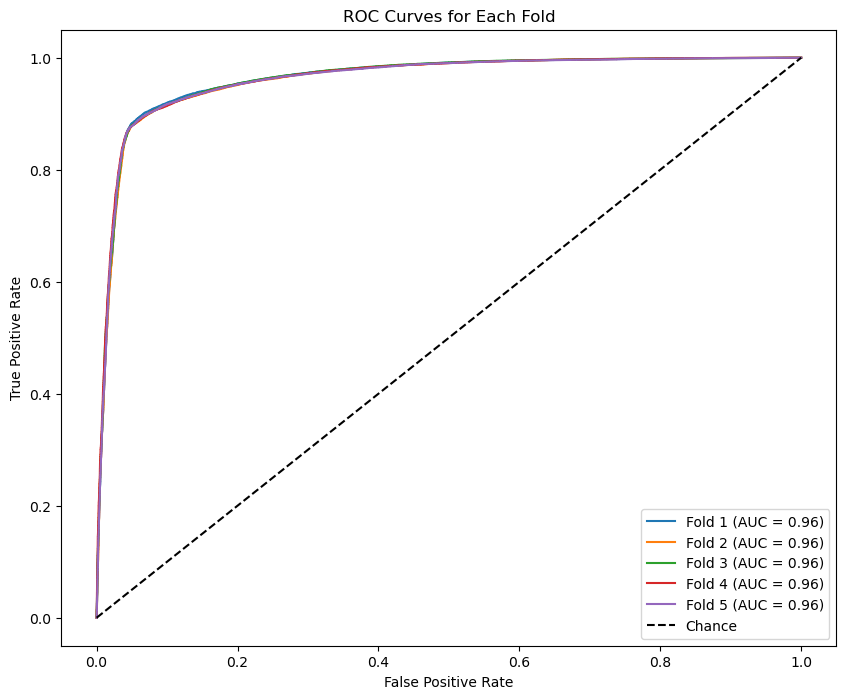

In [64]:
from sklearn.metrics import roc_curve, auc as calculate_auc  # Renaming the function during import

plt.figure(figsize=(10, 8))

# Retrieve and store the train and test indices from the kfold split
split_indices = list(kfold.split(x_train, y_train))

for i, (train_index, test_index) in enumerate(split_indices):
    # Generate predictions
    y_pred_prob = model.predict(x_train.iloc[test_index]).ravel()
    y_true = y_train.iloc[test_index]

    # Compute ROC curve and ROC area for each fold
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = calculate_auc(fpr, tpr)  # Using the renamed function

    # Plot
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Fold')
plt.legend(loc='lower right')
plt.show()


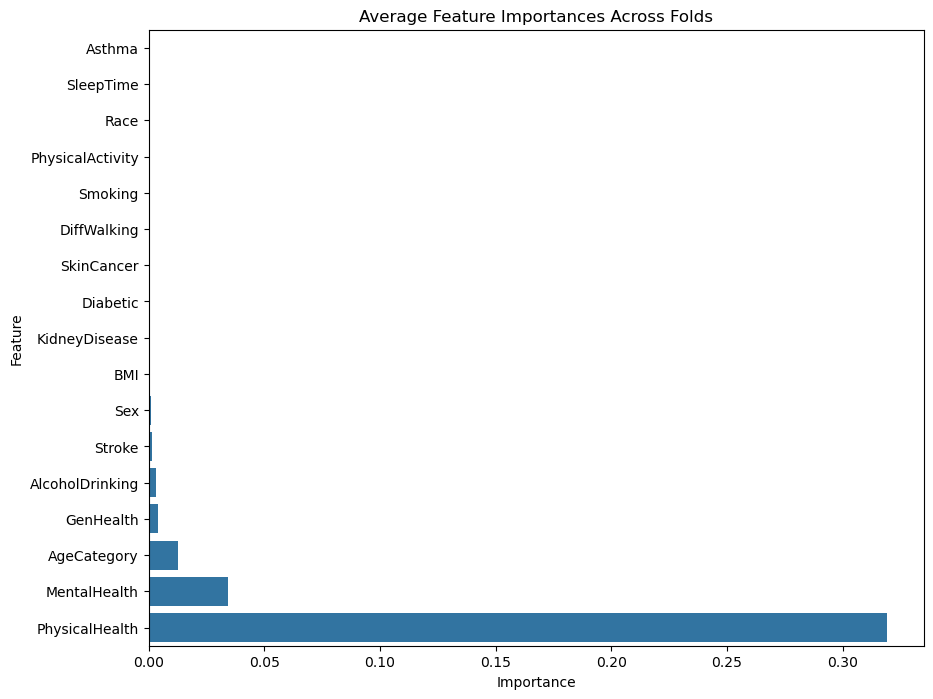

In [65]:
# Average the importance across folds
mean_importances = all_importances.groupby('Feature').Importance.mean().reset_index()

# Plot the average importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mean_importances.sort_values(by='Importance', ascending=True))
plt.title('Average Feature Importances Across Folds')
plt.show()

----